# Kenapa karyawan terus berganti?

## Latar Belakang

Pergantian karyawan adalah persentase total karyawan yang meninggalkan organisasi dalam satu periode tertentu dan biasanya posisi mereka harus ditempati oleh karyawan baru. Pergantian karyawan akan sangat berdampak negatif ke organisasi, di antaranya :
1. Meningkatkan biaya rekrutmen karyawan baru (berdasarakan polling Gallup, biaya rekrutmen karyawan baru sebanding dengan dua kali gaji bulanan karyawan tetap).
2. Menurunkan produktivitas.
3. Mengurangi tingkat kepercayaan karyawan tetap. Melansir laporan SHRM Human Capital Banchmarking rata-rata pergantian karyawan disebuah karyawan mencapai angka 18% saja.


Umumnya, karyawan mengundurkan diri dari pekerjaannya didasari atas pekerjaan yang lebih layak atau bahkan permasalahan manajemen di perusahaan asalnya yang terlalu rumit. Namun ini semua tergantung ke tempat pekerjaannya dan juga masih perlu dilakukan analisis lebih lanjut.


Oleh karenanya, melalui dataset yang dimiliki oleh departemen Human Capital, analisislah mengapa karyawan di perusahaan ini cenderung keluar dari pada bertahan. Pastikan analisis yang dilakukan mengandung tindakan preventif terhadap pergantian karyawan baru di masa depan. Sehingga beberapa yang perlu diketahui jawabannya adalah :
1. Departemen mana yang memiliki tingkat karyawan dengan kemunduran tertinggi? Dan mana yang terendah?
2. Temukan variabel mana yang cocok untuk prediktor kemunduran karyawan baru.
3. Bagaimana caranya organisasi dapat menurunkan tingkat kemunduran karyawan?

## Data dan Metode
Data berhasil dikumpulkan dari wawancara pengunduran diri, tingkat performansi, dan dari sekumpulan data karyawan sebanyak 9.540 karyawan secara total. Adapun variabel yang ada dalam data ini ialah :
- "department" - departemen milik karyawan.
- "promoted" - bernilai 1 jika karyawan dipromosikan sebelum dua tahun, 0 sebaliknya.
- "review" - penilaian performa kinerja karyawan dengan jangkauan 0 sampai 1.
- "projects" - total proyek yang terlibat untuk diikuti.
- "salary" - untuk kerahasiaan, gaji dikelompokkan menjadi low, medium, high.
- "tenure" - sudah berapa lama karyawan menetap di perusahaan.
- "satisfaction" - kepuasan karyawan terhadap perusahan dengan jangkauan 0 sampai 1.
- "bonus" - nilai 1 untuk karyawan yang menerima bonus, 0 sebaliknya.
- "avg_hrs_month" - rata-rata jam kerja dalam satu bulan.
- "left" - "yes" untuk karyawan yang mengundurkan diri, "no" untuk sebaliknya.

## Python libraries

In [1]:
import pandas as pd #Dataframe
import numpy as np #Numerical manipulation
import matplotlib.pyplot as plt #Visualization
from matplotlib.pyplot import figure
import seaborn as sns #Visualization
import plotly.express as px #Visualization
import plotly.graph_objects as go #Visualization
import matplotlib as mpl #Visualization
from sklearn.metrics import roc_auc_score #model_evaluation
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.dpi'] = 250

## Membaca dan memahami data

### Imputasi dataset

In [2]:
df = pd.read_csv('employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [3]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


### Investigasi DataFrame

In [4]:
print(f'Dimension of the data     : {df.shape}')
print(f'Number of row             : {len(df.index)}')
print(f'Number of columns         : {len(df.columns)}')

Dimension of the data     : (9540, 10)
Number of row             : 9540
Number of columns         : 10


In [5]:
def data_information(data, data_name = ''):
    print(f'Data setnya adalah: {data_name}', end = '\n\n')
    display(data.info())
    print(end ='\n\n')
    
    print(f'Informasi Statistik')
    display(data.describe(include = 'all'))
    
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('Banyaknya data duplikat adalah: ', data.duplicated().sum())
    
    else:
        print('Tidak ada data duplikat di sini.', end ='\n\n')
    
    
    print('Persentase angka yang hilang di setiap atribut ataupun kelas adalah: ')
    reports = data.isna().sum() / data.shape[0] * 100
    reports = reports.to_frame()
    reports.rename(columns = {0: 'Persentase keseluruhan data yang hilang'}, inplace = True)
    display(reports)

In [6]:
data_information(df, 'Data Karyawan')

Data setnya adalah: Data Karyawan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


None



Informasi Statistik


,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540,9540.000000,9540.000000,9540.000000,9540,9540.000000,9540.000000,9540.000000,9540.000000,9540
unique,10,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,sales,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,no
freq,1883,NaN,NaN,NaN,6611,NaN,NaN,NaN,NaN,6756
mean,NaN,0.030294,0.651826,3.274843,NaN,6.556184,0.504645,0.212055,184.661571,NaN
std,NaN,0.171403,0.085307,0.579136,NaN,1.415432,0.158555,0.408785,4.144831,NaN
min,NaN,0.000000,0.310000,2.000000,NaN,2.000000,0.000000,0.000000,171.374060,NaN
25%,NaN,0.000000,0.592884,3.000000,NaN,5.000000,0.386801,0.000000,181.472085,NaN
50%,NaN,0.000000,0.647456,3.000000,NaN,7.000000,0.500786,0.000000,184.628796,NaN
75%,NaN,0.000000,0.708379,4.000000,NaN,8.000000,0.622607,0.000000,187.728708,NaN


Tidak ada data duplikat di sini.

Persentase angka yang hilang di setiap atribut ataupun kelas adalah: 


,Persentase keseluruhan data yang hilang
department,0.0
promoted,0.0
review,0.0
projects,0.0
salary,0.0
tenure,0.0
satisfaction,0.0
bonus,0.0
avg_hrs_month,0.0
left,0.0


Merubah nilai numerik (yang biner) menjadi nominal bertipe binominal (bila ditemukan pada sebuah variabel).

In [7]:
categorical = ['promoted','salary', 'department' ,'bonus']

for col in categorical:
    print('===============================')
    print(df[col].value_counts(), '\n')

0    9251
1     289
Name: promoted, dtype: int64 

medium    6611
high      1548
low       1381
Name: salary, dtype: int64 

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64 

0    7517
1    2023
Name: bonus, dtype: int64 



## Exploratory Data Analysis

In [8]:
categorical = ['promoted','salary', 'department',
               'bonus', 'left']
numerical = ['review', 'projects','tenure',
             'satisfaction','avg_hrs_month']

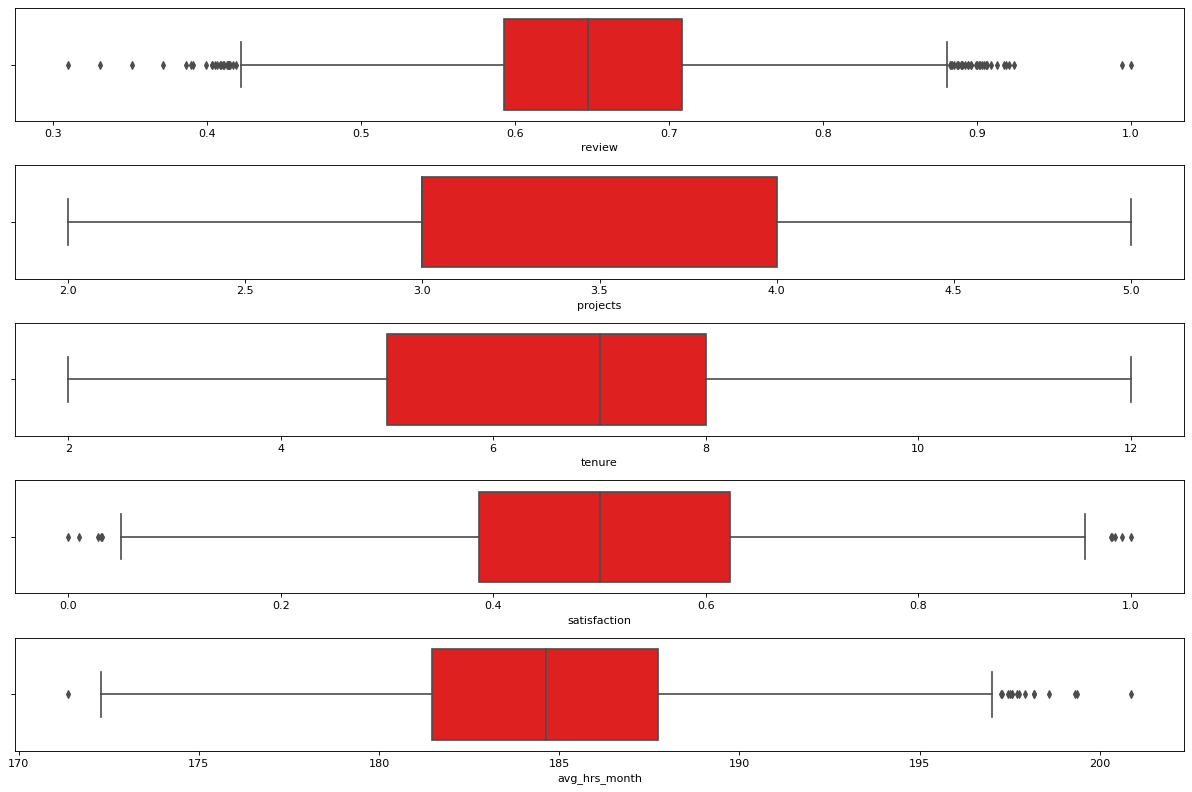

In [9]:
figure(figsize=(15, 10), dpi=80)
for i in range(0, len(numerical)):
    plt.subplot(5, len(numerical)/4, i+1)
    sns.boxplot(df[numerical[i]], color='red', orient= "v")
    plt.tight_layout()

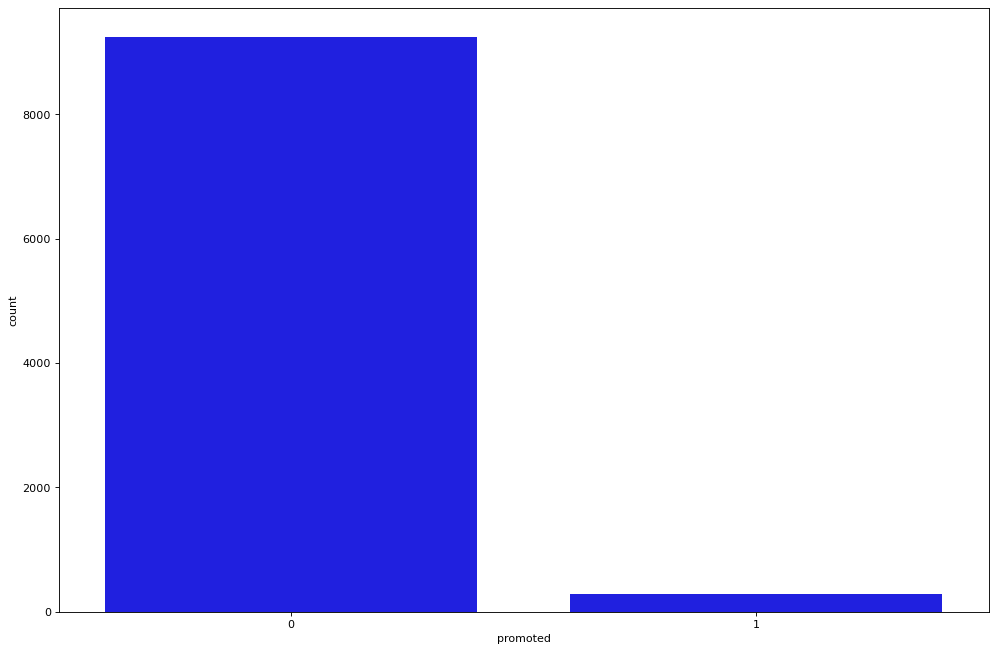

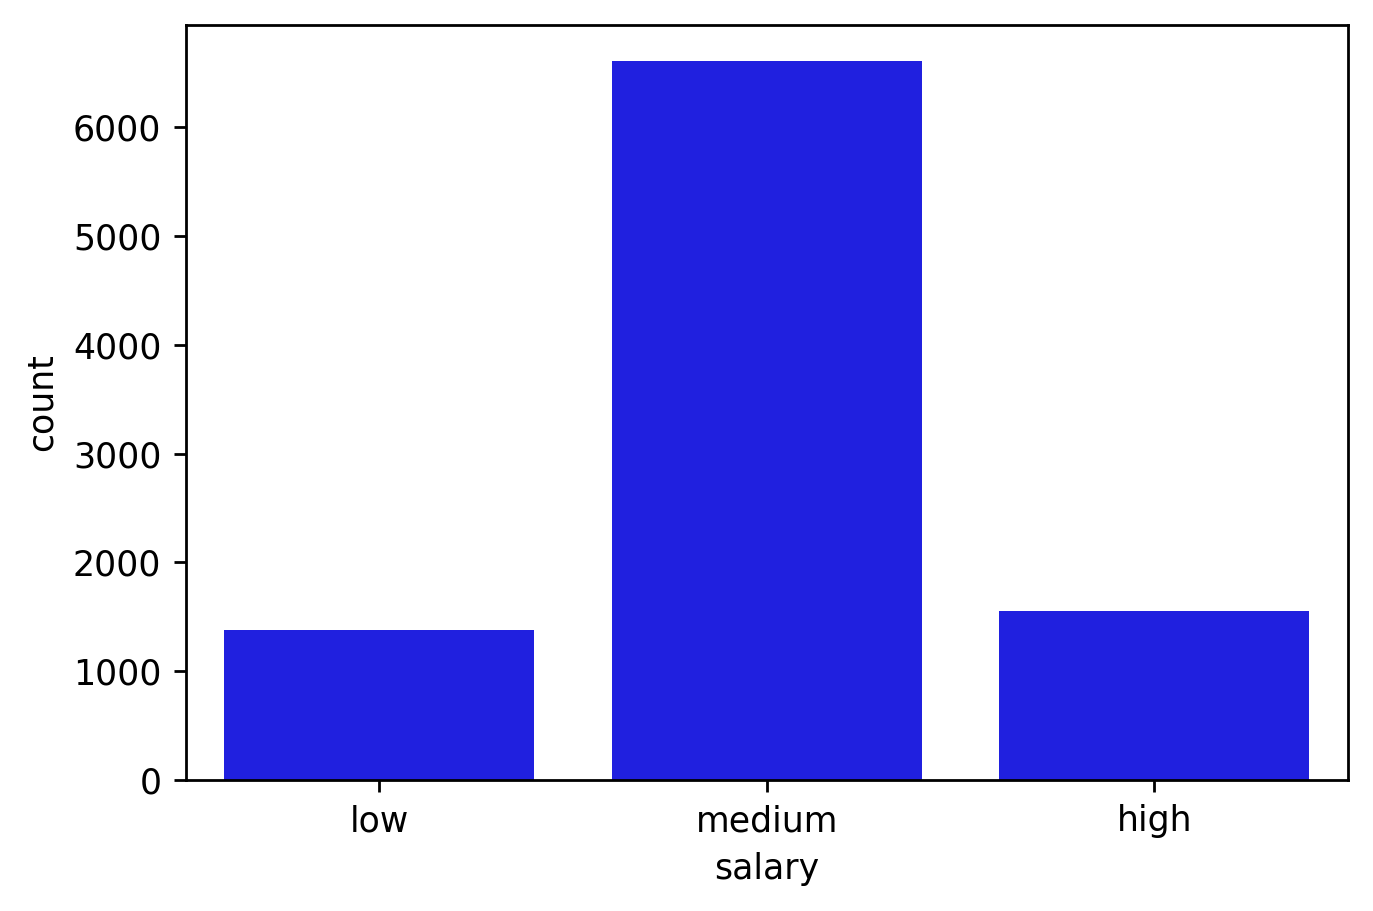

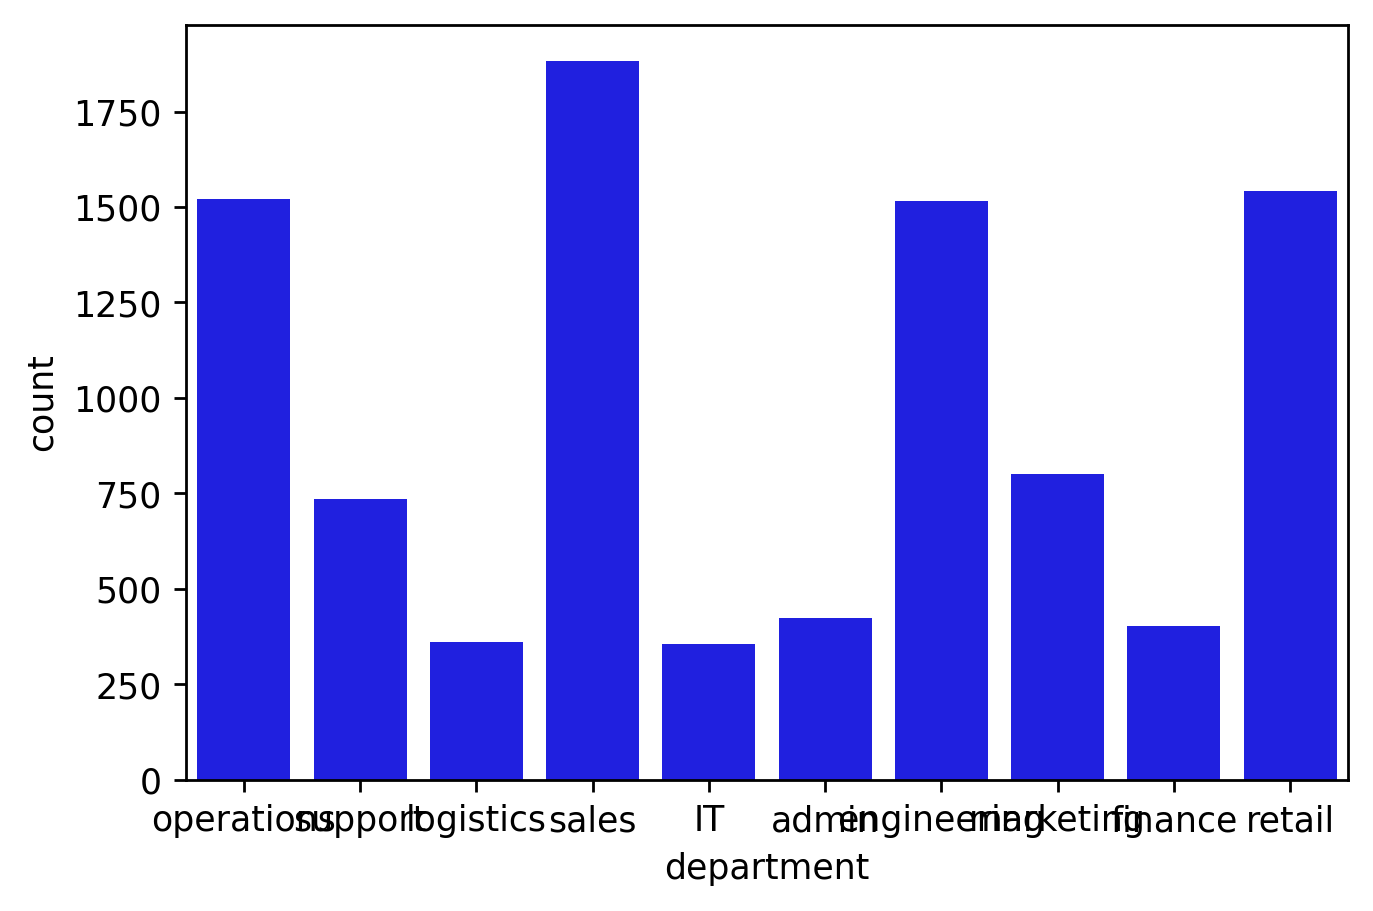

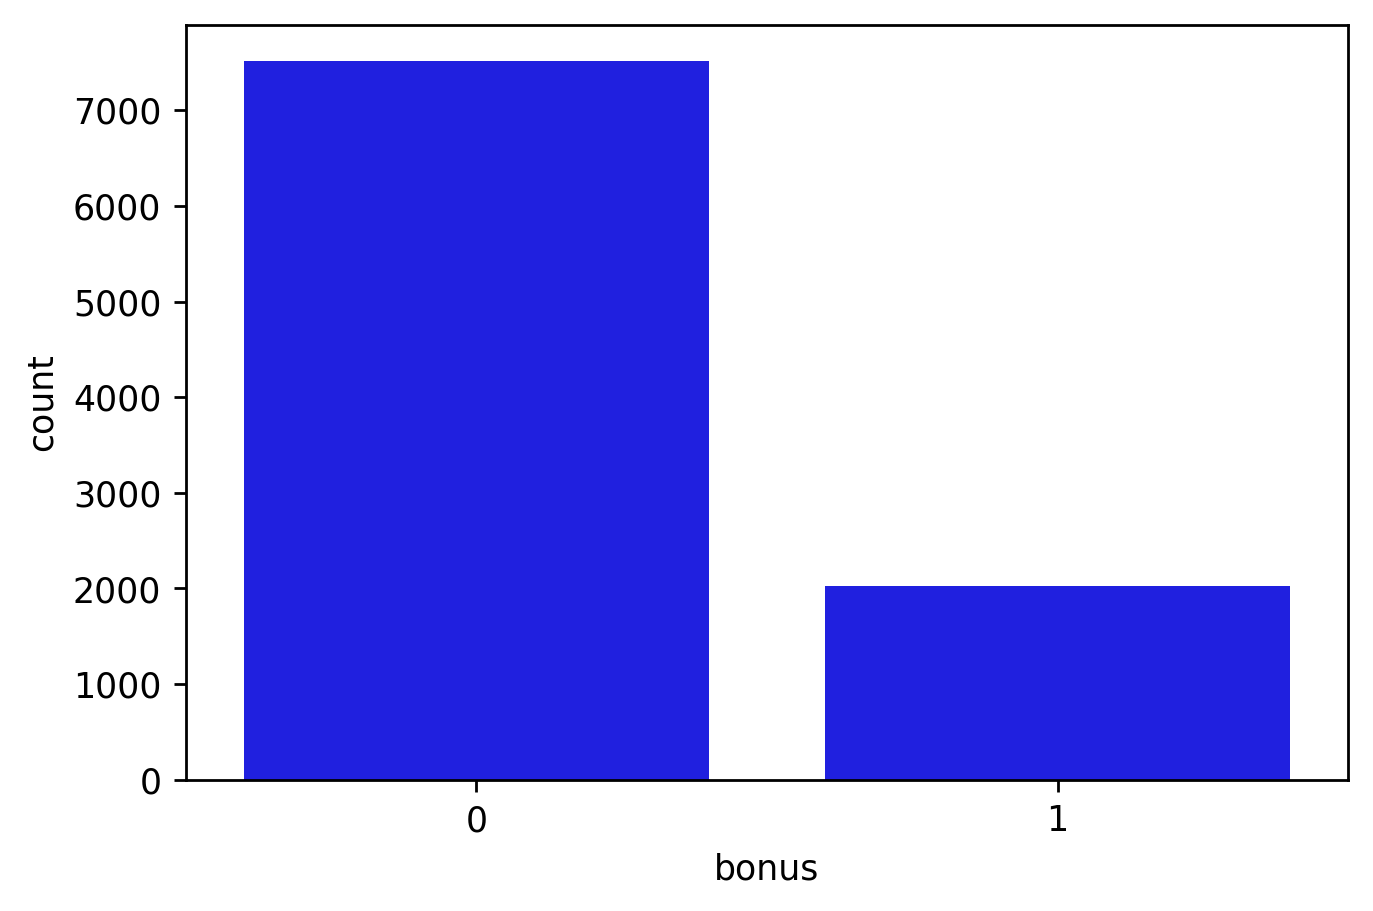

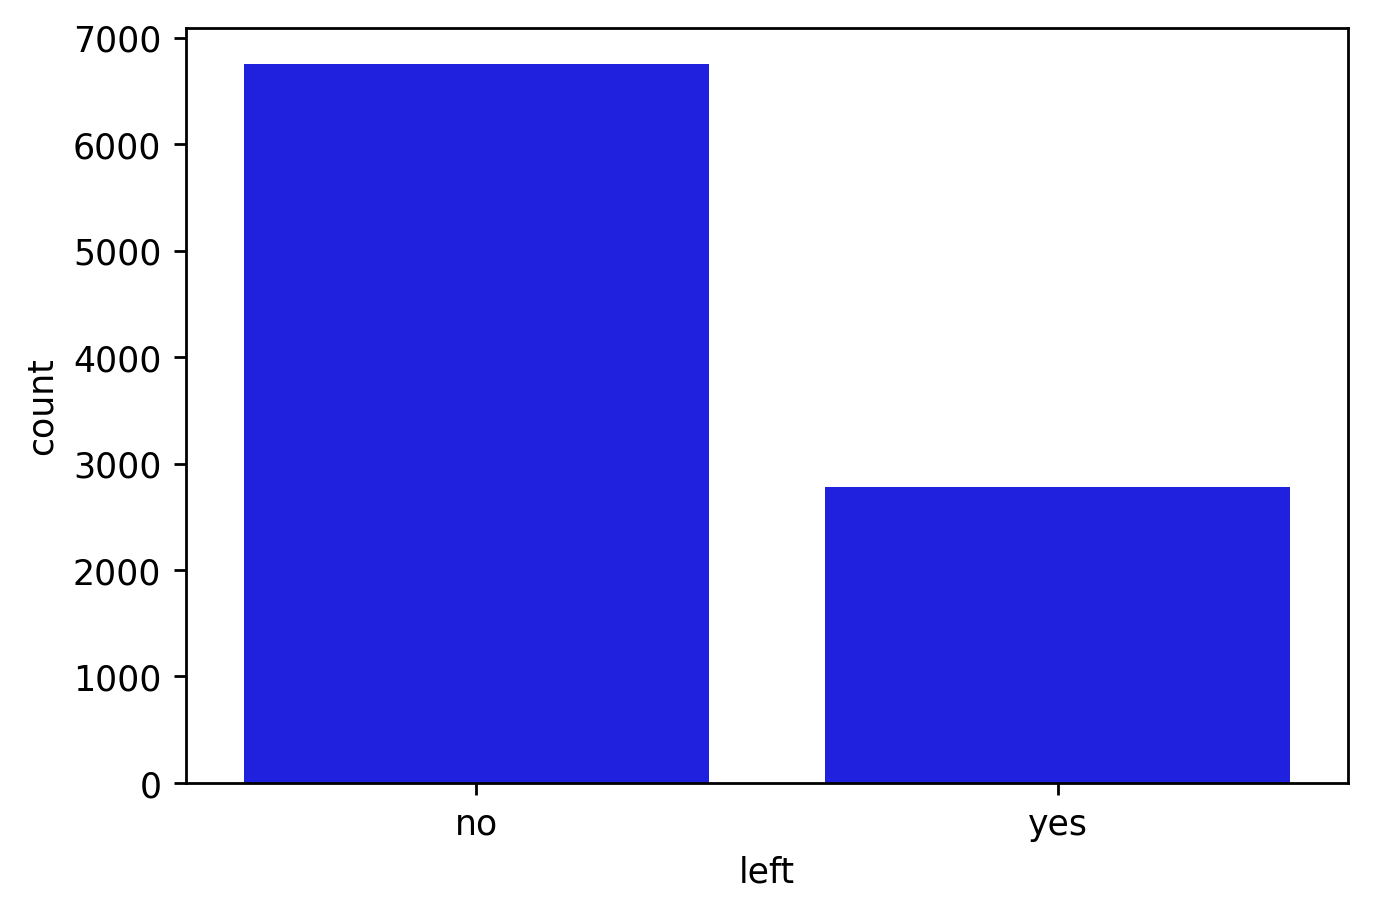

In [10]:
figure(figsize=(15, 10), dpi=80)
for i in range(0, len(categorical)):
    sns.countplot(df[categorical[i]], color="blue", orient="v")
    plt.show()

In [11]:
categorical = ['promoted','salary', 'department' ,'bonus']

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (30, 30))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(categorical, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x = feature, hue = 'left', data = df)
    plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
    plt.ylabel('Employee Count', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis = 'y', labelsize = 20)

    plt.legend(['Not Left', 'Left'], loc = 'upper center', prop = {'size': 18})
    plt.title('Count Left in {} Feature'.format(feature), size = 20, y = 1.05)

plt.show()

## Feature Importance Analysis

__Berlaku untuk categorical feature saja__

Mengetahui variabel mana saja yang mempengaruhi variabel target (kelas) dari dataset sangat penting dilakukan. 
Hal ini bertujuan untuk mencapai jawaban yang diminta dari tiga pertanyaan pertama. Ada beberapa metode dalam melakukan analisis variabel penting, di antaranya Risk Ratio dan juga Mutual Information.

### Rasio Risiko

Rasio risiko adalah nilai perbandingan antar sebuah grup dengan nilai keselurahan grup yang ada. Hal ini akan mengukur departemen mana yang memiliki tingkat pergantian karyawan tertinggi dan terendah. 

Pengukuran rasio risiko juga berguna untuk melihat apakah sebuah departemen layak untuk dianalisis lebih lanjut atau tidak. Hal tersebut didasari pada nilai persentase antara satu departemen dengan nilai persentase kesuluruhan departemen yang memiliki nilai pergantian karyawan atau tidak.

In [12]:
pd.crosstab(df['department'], df['left'],
           normalize='index', margins=True)

left,no,yes
department,,
IT,0.691011,0.308989
admin,0.718676,0.281324
engineering,0.711741,0.288259
finance,0.731343,0.268657
logistics,0.691667,0.308333
marketing,0.697007,0.302993
operations,0.713535,0.286465
retail,0.694354,0.305646
sales,0.714817,0.285183


- **IT** dan **Logistics** memiliki persentase tertinggi untuk nilai pergantian karyawan.
- **Finance** memiliki persentase terendah untuk nilai pergantian karyawan.
Dari data keseluruhan departemen dapat dilihat bahwa perbedaan antara karyawan yang keluar (turnover) dengan karyawan tetap menciptakan rasio klaster 70:30, ditambah lagi hampir keseluruhan departmen memiliki rasio yang sama juga. Sehingga perlu dilakukan analisis lebih lanjut di tiap departemennya.

In [13]:
left_encoded = {'no':0, 'yes':1}
df['left'] = df['left'].apply(lambda x: left_encoded[x])

In [14]:
global_mean = df['left'].mean()

sales_mean = df[df['department']=='sales']['left'].mean()

retail_mean = df[df['department']=='retail']['left'].mean()

ops_mean = df[df['department']=='operations']['left'].mean()

eng_mean = df[df['department']=='engineering']['left'].mean()

mark_mean = df[df['department']=='marketing']['left'].mean()

sup_mean = df[df['department']=='support']['left'].mean()

admin_mean = df[df['department']=='admin']['left'].mean()

fin_mean = df[df['department']=='finance']['left'].mean()

log_mean = df[df['department']=='logistics']['left'].mean()

it_mean = df[df['department']=='IT']['left'].mean()

In [15]:
values = [['sales',sales_mean, round(sales_mean/global_mean,3)],
        ['retail',retail_mean, round(retail_mean/global_mean,3)],
          ['operations',ops_mean, round(ops_mean/global_mean,3)],
          ['engineering', eng_mean,round(eng_mean/global_mean,3)],
          ['marketing', mark_mean, round(mark_mean/global_mean,3)],
          ['support', sup_mean, round(sup_mean/global_mean,3)],
          ['admin', admin_mean, round(admin_mean/global_mean,3)],
          ['finance', fin_mean, round(fin_mean/global_mean,3)],
          ['logistics',log_mean, round(log_mean/global_mean,3)],
          ['IT', it_mean, round(it_mean/global_mean,3)],
          ['global mean', global_mean, 1]]

dep_ratio_df = pd.DataFrame(values, 
            columns=['department','values', 'risk ratio'])
dep_ratio_df

,department,values,risk ratio
0,sales,0.285183,0.977
1,retail,0.305646,1.047
2,operations,0.286465,0.982
3,engineering,0.288259,0.988
4,marketing,0.302993,1.038
5,support,0.288435,0.988
6,admin,0.281324,0.964
7,finance,0.268657,0.921
8,logistics,0.308333,1.057
9,IT,0.308989,1.059


**Tentunya diperlukan sebuah metrik seberapa besar suatu karyawan dari setiap departemen memiliki kemungkinan untuk turnover** . Telah didapatkan sebuah nilai risiko dari rentang nilai 0 hingga tak terhingga. Dapat dilihat bahwa rata-rata keseluruhan tiap departemen bernilai 1.000, sehingga bila nilai risk ratio nya lebih besar dari itu.

Oleh karenanya yang menjadi pusat perhatian adalah departemen _retail, marketing, logistics, dan juga IT_.

In [16]:
sal_medium = df[df['salary']=='medium']['left'].mean()
sal_high = df[df['salary']=='high']['left'].mean()
sal_low = df[df['salary']=='low']['left'].mean()

In [17]:
values = [['low',sal_low, round(sal_low/global_mean,3)],
          ['medium',sal_medium, round(sal_medium/global_mean,3)],
          ['high', sal_high, round(sal_high/global_mean,3)],
          ['global mean', global_mean, 1]]
sal_risk_df = pd.DataFrame(values, 
        columns=['salary categories','values', 'risk ratio'])
sal_risk_df

,salary categories,values,risk ratio
0,low,0.283128,0.970
1,medium,0.295114,1.011
2,high,0.285530,0.978
3,global mean,0.291824,1.000


In [18]:
promoted_yes = df[df['promoted']=='yes']['left'].mean()
print(f'Promoted = Yes:{round(promoted_yes,3)},\
Risk Ratio: {round(promoted_yes/ global_mean,3)}')

promoted_no = df[df['promoted']=='no']['left'].mean()
print(f'Promoted = No: {round(promoted_no,3)},\
Risk Ratio: {round(promoted_no/global_mean,3)}')

Promoted = Yes:nan,Risk Ratio: nan
Promoted = No: nan,Risk Ratio: nan


In [19]:
bonus_yes = df[df['bonus']=='yes']['left'].mean()
print(f'Bonus = Yes: {round(bonus_yes, 3)}, \
Risk Ratio: {round(bonus_yes/global_mean, 3)}')

bonus_no = df[df['bonus']=='no']['left'].mean()
print(f'Bonus = No: {round(bonus_no,3)}, \
Risk Ratio: {round(bonus_no/global_mean,3)}')

Bonus = Yes: nan, Risk Ratio: nan
Bonus = No: nan, Risk Ratio: nan


- Untuk kolom **salary** nilai yang bertipe **medium** adalah karyawan yang sangat berisiko untuk turnover.
- Untuk kolom **promoted** dengan karyawan yang tidak mendapatkan promosi **(nilainya adalah 0)**.
- Untuk kolom **bonus** karyawan yang tidak mendapatkan bonus akan berpotensi kecil untuk turnover.

In [20]:
from IPython.display import display

cat_cols = ['department', 'promoted','salary', 'bonus']

for col in cat_cols:
    df_group = df.groupby(by=col)['left'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
department,,,
IT,0.308989,0.017165,1.058819
admin,0.281324,-0.010500,0.964019
engineering,0.288259,-0.003565,0.987783
finance,0.268657,-0.023167,0.920612
logistics,0.308333,0.016509,1.056573
marketing,0.302993,0.011169,1.038272
operations,0.286465,-0.005359,0.981637
retail,0.305646,0.013822,1.047363
sales,0.285183,-0.006641,0.977244


,mean,diff,risk
promoted,,,
0,0.294779,0.002955,1.010126
1,0.197232,-0.094592,0.675859


,mean,diff,risk
salary,,,
high,0.285530,-0.006294,0.978432
low,0.283128,-0.008696,0.970202
medium,0.295114,0.003290,1.011275


,mean,diff,risk
bonus,,,
0,0.294532,0.002708,1.009281
1,0.281760,-0.010064,0.965513


- Untuk kolom **departemen** : khususnya bertipe _retail, logistics, marketing, dan IT_ sangat rentan untuk melakukan turnover. Untuk tipe nilai lainnya tidak terlalu berisiko.
- Untuk kolom **promoted** : karyawan yang tidak dipromosi cenderung turnover namun dengan nilai yang sangat kecil.
- Untuk kolom **salary** : sama halnya dengan promosi, karyawan dengan gaji di level medium pun cukup berisiko.
- Untuk karyawan yang tidak mendapatkan **bonus** juga ada kecenderungan untuk melakukan turnover.

### Mutual Information

Nilai rasio risiko yang hanya berselisihan sedikit saja membuat kesulitan untuk menentukan mana variabel yang menjadi kunci utama karywan melakukan kemunduran. 

Karena itu, mutual information dapat digunakan. Mutual information dapat digunakan untuk membandingkan dua variabel (feature dengan target) untuk melihat ketergantungan terbesar mana yang dimiliki variabel kepada labelnya. Bila nilai ketergantungannya **tinggi** sudah jelas variabel tersebut menjadi penentu label di dataset. Nilai keterhubungan yang **kecil** berlaku sebaliknya.

In [21]:
from sklearn.metrics import mutual_info_score

def cal_mi(series):
    return mutual_info_score(series, df['left'])

df_mi = df[cat_cols].apply(cal_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(
    name='Mutual Information'
)
df_mi

,Mutual Information
promoted,0.000729
department,0.000257
bonus,0.000066
salary,0.000060


In [22]:
df.loc[df['review'] <= 0.6].groupby(['left','promoted','bonus']).count()

department  review  projects  salary  tenure  \
left promoted bonus                                                 
0    0        0            1633    1633      1633    1633    1633   
              1             451     451       451     451     451   
     1        0              53      53        53      53      53   
              1              13      13        13      13      13   
1    0        0             402     402       402     402     402   
              1             110     110       110     110     110   
     1        0               7       7         7       7       7   

                     satisfaction  avg_hrs_month  
left promoted bonus                               
0    0        0              1633           1633  
              1               451            451  
     1        0                53             53  
              1                13             13  
1    0        0               402            402  
              1               110            110  
     1        0                 7              7

Masuk akal setiap nilai perbandingan yang didapatkan dari nilai review perusahaan ke karyawannya yang berada di bawah 0,6. Perbandingan sebelumnya (70:30) juga tetap terlihat di tabular agregat ini.

In [23]:
review_data = df.groupby(['department','review',]).agg({
    'avg_hrs_month': sum,
    'satisfaction': max
})
review_data

avg_hrs_month  satisfaction
department review                               
IT         0.422341     185.961653      0.675074
           0.446608     187.624465      0.420712
           0.456479     177.868185      0.918924
           0.464891     188.210270      0.425332
           0.471012     184.063698      0.674173
...                            ...           ...
support    0.860334     178.152991      0.306740
           0.862555     182.379596      0.262039
           0.878795     182.724248      0.296670
           0.882596     180.233129      0.189869
           0.889698     178.768517      0.269756

[9540 rows x 2 columns]

Meskipun penilaian dari perusahaan tinggi, tidak menjamin karyawan tersebut puas terhadap kondisi kantornya.

## Data Preprocessing

### Handling Outliers

In [24]:
numerical

['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

In [25]:
# using zscore
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in numerical:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
left_filtered = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(left_filtered)}')

Jumlah baris sebelum memfilter outlier: 9540
Jumlah baris setelah memfilter outlier: 9490


### Feature Encoding

In [26]:
left_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9490 non-null   object 
 1   promoted       9490 non-null   int64  
 2   review         9490 non-null   float64
 3   projects       9490 non-null   int64  
 4   salary         9490 non-null   object 
 5   tenure         9490 non-null   float64
 6   satisfaction   9490 non-null   float64
 7   bonus          9490 non-null   int64  
 8   avg_hrs_month  9490 non-null   float64
 9   left           9490 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 815.5+ KB


In [27]:
# feature encode
for cat in [['department', 'salary']]:
    onehots = pd.get_dummies(left_filtered[cat], prefix=cat)
    left_filtered2 = left_filtered.join(onehots)
left_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 0 to 9539
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              9490 non-null   object 
 1   promoted                9490 non-null   int64  
 2   review                  9490 non-null   float64
 3   projects                9490 non-null   int64  
 4   salary                  9490 non-null   object 
 5   tenure                  9490 non-null   float64
 6   satisfaction            9490 non-null   float64
 7   bonus                   9490 non-null   int64  
 8   avg_hrs_month           9490 non-null   float64
 9   left                    9490 non-null   int64  
 10  department_IT           9490 non-null   uint8  
 11  department_admin        9490 non-null   uint8  
 12  department_engineering  9490 non-null   uint8  
 13  department_finance      9490 non-null   uint8  
 14  department_logistics    9490 non-null   

### Data Transformation

In [28]:
from sklearn.preprocessing import StandardScaler
x_left = left_filtered2.drop(columns = ['left', 'salary', 'department'], axis=1)
y_left = left_filtered2['left']

sc = StandardScaler()
x_left2 = sc.fit_transform(x_left)

In [29]:
x_left3 = pd.DataFrame(x_left2, columns=x_left.columns)
x_left3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   promoted                9490 non-null   float64
 1   review                  9490 non-null   float64
 2   projects                9490 non-null   float64
 3   tenure                  9490 non-null   float64
 4   satisfaction            9490 non-null   float64
 5   bonus                   9490 non-null   float64
 6   avg_hrs_month           9490 non-null   float64
 7   department_IT           9490 non-null   float64
 8   department_admin        9490 non-null   float64
 9   department_engineering  9490 non-null   float64
 10  department_finance      9490 non-null   float64
 11  department_logistics    9490 non-null   float64
 12  department_marketing    9490 non-null   float64
 13  department_operations   9490 non-null   float64
 14  department_retail       9490 non-null   

In [30]:
x_left3.columns

Index(['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus',
       'avg_hrs_month', 'department_IT', 'department_admin',
       'department_engineering', 'department_finance', 'department_logistics',
       'department_marketing', 'department_operations', 'department_retail',
       'department_sales', 'department_support', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

### Imbalance Data

In [31]:
left = left_filtered2['left'].value_counts()[1]
not_left = left_filtered2['left'].value_counts()[0]
left_per = left / left_filtered2.shape[0] * 100
not_left_per = not_left / left_filtered2.shape[0] * 100

print('{} dari {} karyawan meninggalkan perusahaan dan ini sebesar {:.2f}% dari data set.'.format(left, left_filtered2.shape[0], left_per))
print('{} dari {} karyawan tidak meninggalkan perusahaan dan ini sebesar {:.2f}% dari data set.'.format(not_left, left_filtered2.shape[0], not_left_per))

2771 dari 9490 karyawan meninggalkan perusahaan dan ini sebesar 29.20% dari data set.
6719 dari 9490 karyawan tidak meninggalkan perusahaan dan ini sebesar 70.80% dari data set.


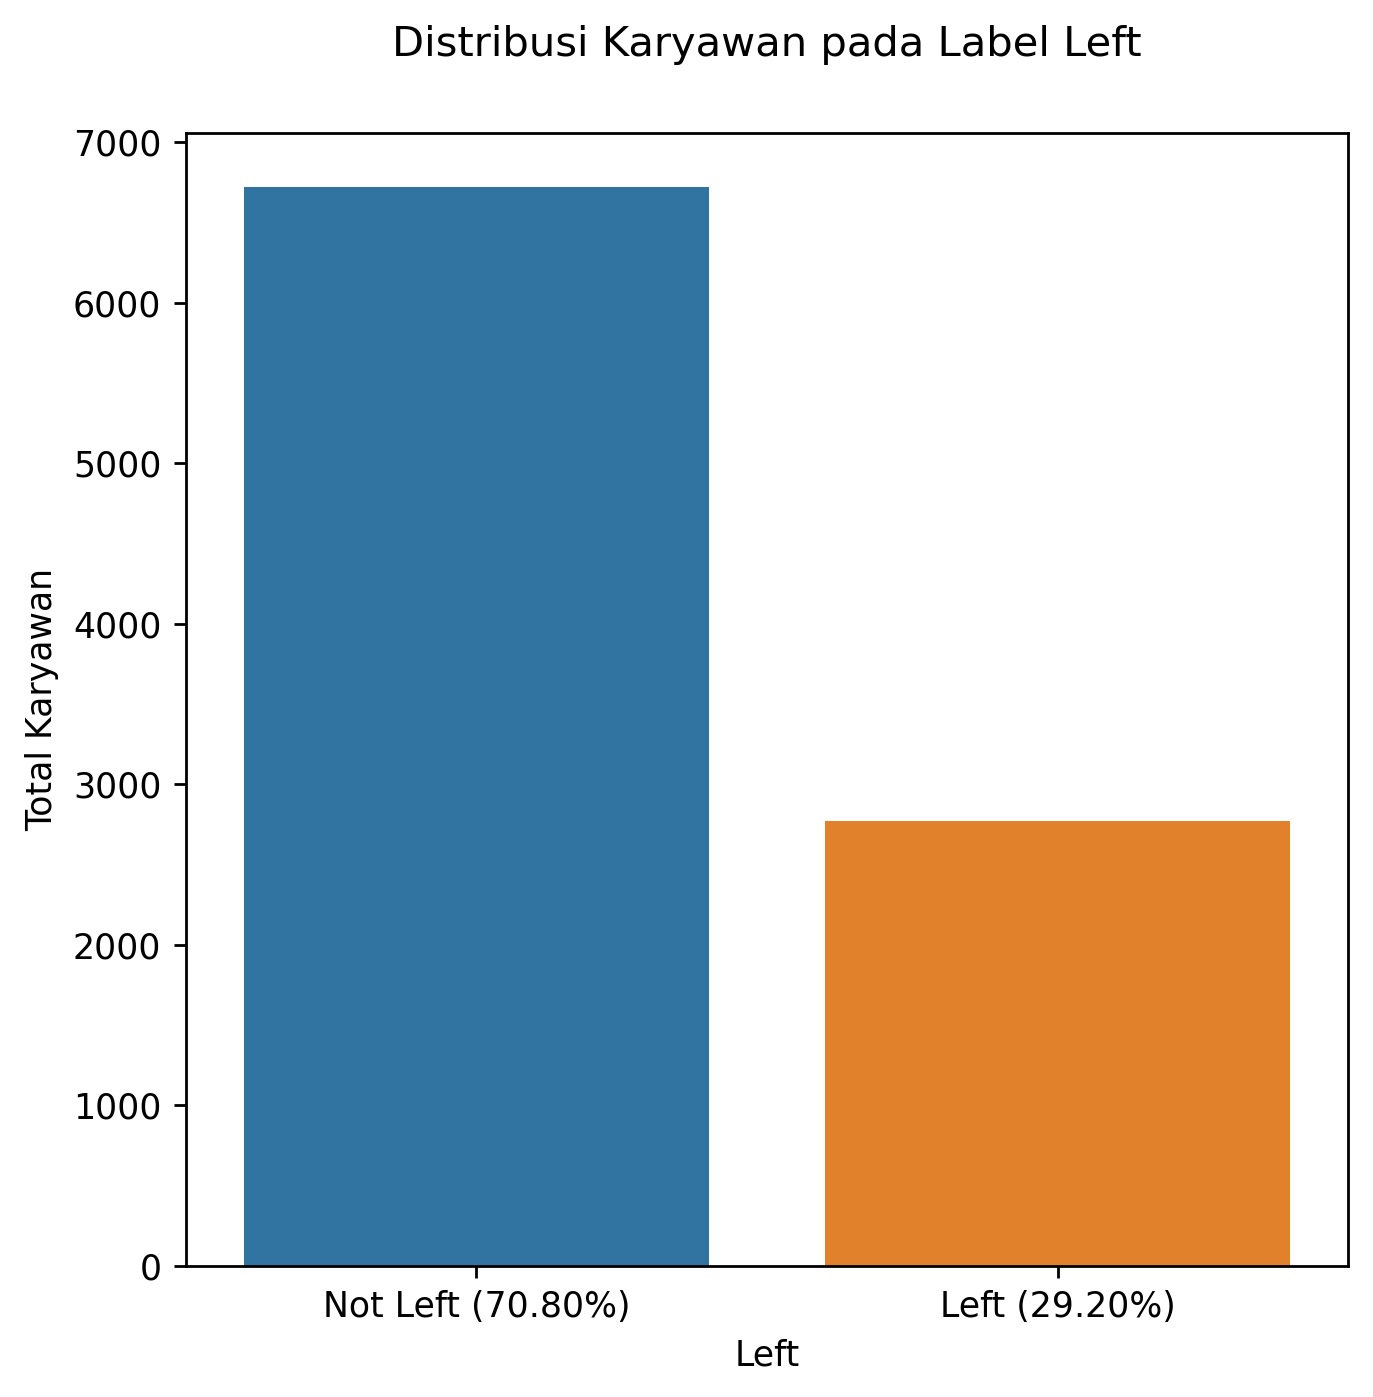

In [32]:
plt.figure(figsize = (6, 6))
sns.countplot(left_filtered2['left'])

plt.xlabel('Left')
plt.ylabel('Total Karyawan')
plt.xticks((0, 1), ['Not Left ({0:.2f}%)'.format(not_left_per), 'Left ({0:.2f}%)'.format(left_per)])
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')

plt.title('Distribusi Karyawan pada Label Left', y = 1.05)
plt.show()

In [33]:
# Handling with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_left3, y_left)

In [34]:
left_im = y_smote.value_counts()[1]
not_left_im = y_smote.value_counts()[0]
left_per_im = left_im / y_smote.shape[0] * 100
not_left_per_im = not_left_im / y_smote.shape[0] * 100

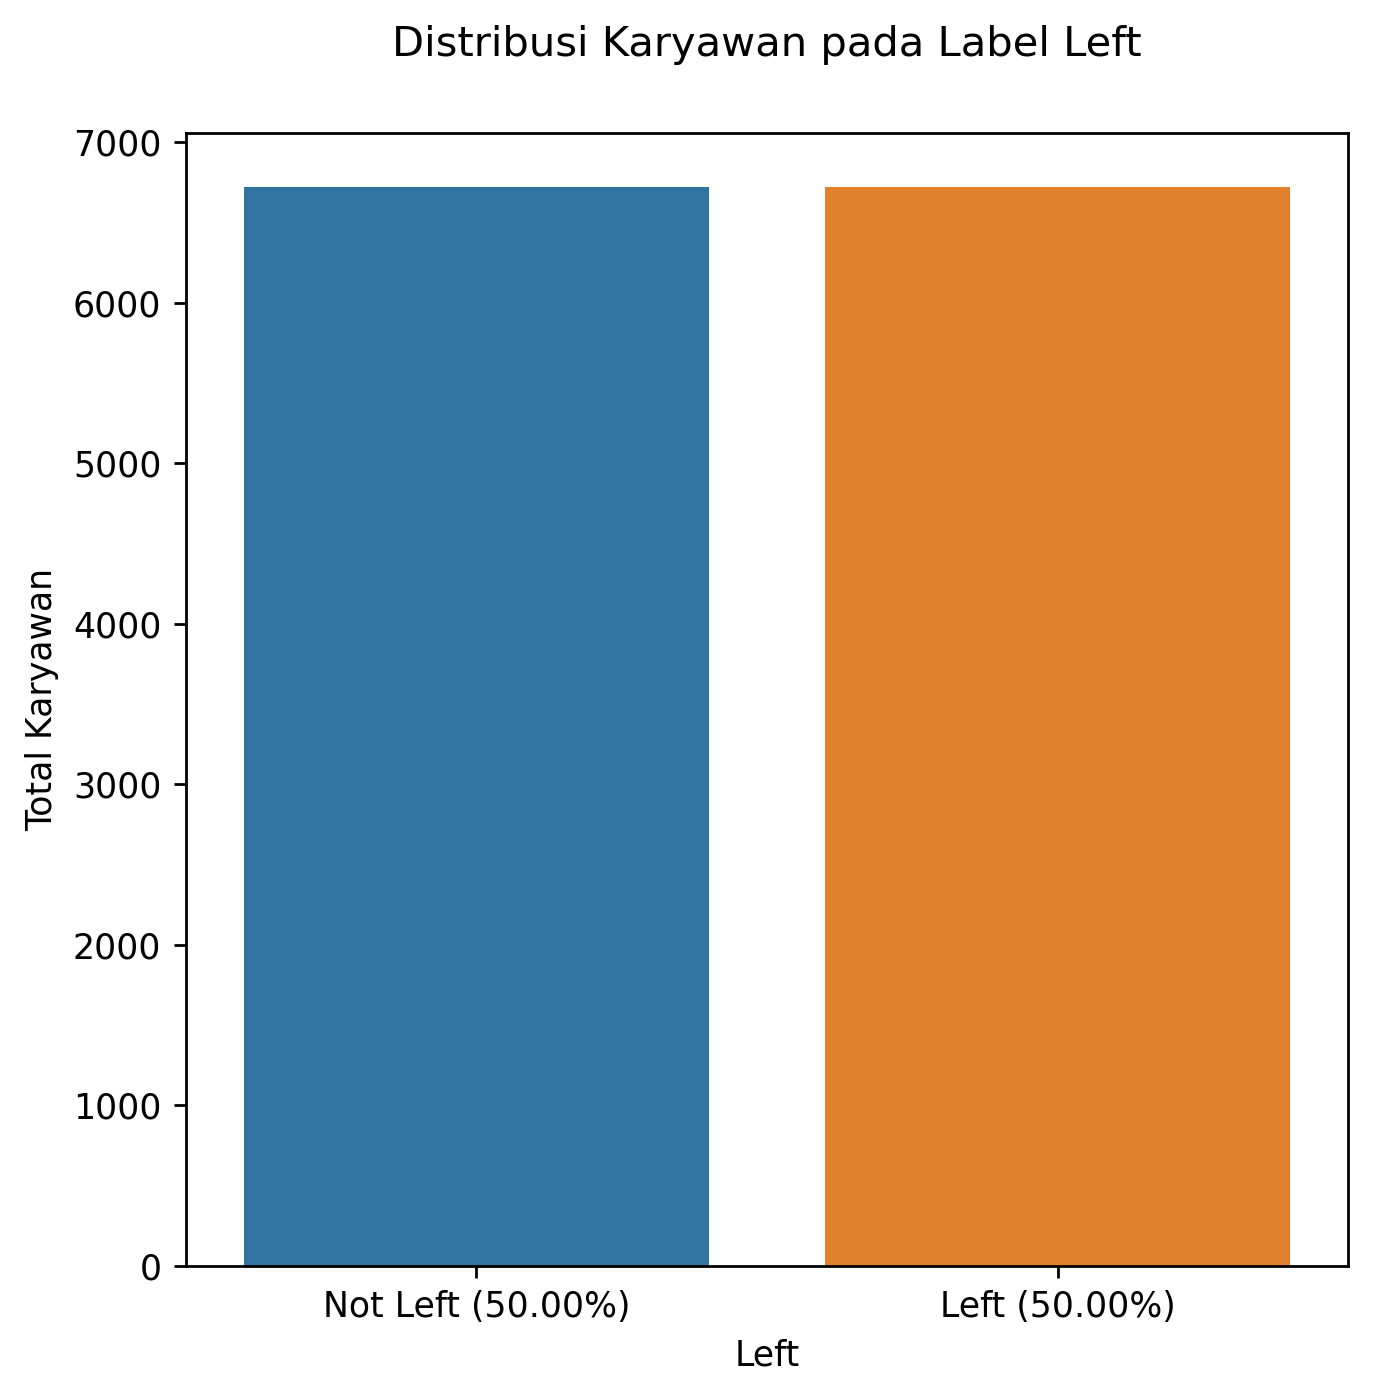

In [35]:
plt.figure(figsize = (6, 6))
sns.countplot(y_smote)
plt.xlabel('Left')
plt.ylabel('Total Karyawan')
plt.xticks((0, 1), ['Not Left ({0:.2f}%)'.format(not_left_per_im), 'Left ({0:.2f}%)'.format(left_per_im)])
plt.tick_params(axis = 'x')
plt.tick_params(axis = 'y')

plt.title('Distribusi Karyawan pada Label Left', y = 1.05)
plt.show()

In [36]:
y_smote.value_counts()

0    6719
1    6719
Name: left, dtype: int64

In [37]:
y_smote2 = y_smote.astype(str)

In [38]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13438 entries, 0 to 13437
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   promoted                13438 non-null  float64
 1   review                  13438 non-null  float64
 2   projects                13438 non-null  float64
 3   tenure                  13438 non-null  float64
 4   satisfaction            13438 non-null  float64
 5   bonus                   13438 non-null  float64
 6   avg_hrs_month           13438 non-null  float64
 7   department_IT           13438 non-null  float64
 8   department_admin        13438 non-null  float64
 9   department_engineering  13438 non-null  float64
 10  department_finance      13438 non-null  float64
 11  department_logistics    13438 non-null  float64
 12  department_marketing    13438 non-null  float64
 13  department_operations   13438 non-null  float64
 14  department_retail       13438 non-null

In [39]:
df = pd.concat([x_smote, y_smote], axis=1).reset_index()

In [40]:
df.to_csv('employee_data.csv', index = False)

## Persiapan Data - Machine Learning

In [41]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(
    df, test_size=0.2, random_state=21
)

In [42]:
df_train, df_val = train_test_split(
    df_train_full, test_size=0.33, random_state=21
)
y_train = df_train['left'].values
y_train2 = df_train['left']
y_val = df_val['left'].values
y_val2 = df_val['left']

del df_train['left']
del df_val['left']
df_train.head()

,index,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,...,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium
2007,2007,-0.176911,-0.352609,-0.473313,-0.393374,0.968453,-0.519033,-0.338565,-0.196266,-0.215189,...,-0.210046,-0.198284,-0.302792,-0.435854,-0.43876,2.019302,-0.289317,2.268562,-0.411455,-1.500742
8847,8847,-0.176911,-0.919653,-0.473313,0.323431,0.426552,-0.519033,0.615788,-0.196266,-0.215189,...,-0.210046,-0.198284,-0.302792,-0.435854,-0.43876,-0.495221,-0.289317,-0.440808,2.430399,-1.500742
8925,8925,-0.176911,0.344912,-0.473313,0.323431,0.829659,-0.519033,0.669030,-0.196266,-0.215189,...,-0.210046,-0.198284,-0.302792,-0.435854,-0.43876,-0.495221,3.456413,-0.440808,-0.411455,0.666337
5779,5779,5.652556,0.086812,-0.473313,0.323431,-0.758892,-0.519033,0.015027,-0.196266,-0.215189,...,-0.210046,-0.198284,-0.302792,-0.435854,-0.43876,-0.495221,-0.289317,2.268562,-0.411455,-1.500742
6876,6876,-0.176911,0.368811,-0.473313,1.040235,-0.787085,1.926659,0.793485,-0.196266,-0.215189,...,-0.210046,-0.198284,-0.302792,-0.435854,-0.43876,2.019302,-0.289317,-0.440808,-0.411455,0.666337


In [43]:
categorical = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month', 'salary_high', 'salary_low',
       'salary_medium', 'department_IT', 'department_admin',
       'department_engineering', 'department_finance', 'department_logistics',
       'department_marketing', 'department_operations', 'department_retail',
       'department_sales', 'department_support']
numerical = ['review', 'projects','tenure', 'promoted', 'bonus',
             'satisfaction','avg_hrs_month']
train_dict = df_train[categorical + numerical]\
.to_dict(orient='records')

In [44]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [45]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [46]:
X_train = dv.transform(train_dict)
dv.get_feature_names()

['avg_hrs_month',
 'bonus',
 'department_IT',
 'department_admin',
 'department_engineering',
 'department_finance',
 'department_logistics',
 'department_marketing',
 'department_operations',
 'department_retail',
 'department_sales',
 'department_support',
 'projects',
 'promoted',
 'review',
 'salary_high',
 'salary_low',
 'salary_medium',
 'satisfaction',
 'tenure']

In [47]:
val_dict = df_val[categorical + numerical]\
.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [48]:
X_train

array([[-0.33856472, -0.51903314, -0.19626631, ..., -1.50074233,
         0.96845268, -0.39337383],
       [ 0.61578784, -0.51903314, -0.19626631, ..., -1.50074233,
         0.42655189,  0.32343064],
       [ 0.66903028, -0.51903314, -0.19626631, ...,  0.6663369 ,
         0.82965925,  0.32343064],
       ...,
       [ 0.59754419,  1.92665926, -0.19626631, ...,  0.6663369 ,
         1.37854188,  0.32343064],
       [ 0.76221792, -0.51903314, -0.19626631, ...,  0.6663369 ,
         0.01960535,  1.0402351 ],
       [ 2.01686914, -0.51903314, -0.19626631, ..., -1.50074233,
         1.02585808,  1.75703957]])

## Decision Tree - Machine Learning

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:,1]
print(f'Training Score: \
{roc_auc_score(y_train,y_pred):.2f}')

Training Score: 1.00


In [50]:
y_pred = dt.predict_proba(X_val)[:,1]
print(f'Validation Score: \
{roc_auc_score(y_val, y_pred):.2f}')

Validation Score: 0.82


In [51]:
from sklearn.tree import export_text

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
tree_text = export_text(dt,
            feature_names=dv.feature_names_)
print(tree_text)

|--- review <= 0.72
|   |--- avg_hrs_month <= 0.24
|   |   |--- class: 0
|   |--- avg_hrs_month >  0.24
|   |   |--- class: 1
|--- review >  0.72
|   |--- avg_hrs_month <= 1.33
|   |   |--- class: 1
|   |--- avg_hrs_month >  1.33
|   |   |--- class: 0



In [52]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print(f'Area Under the Curve - Training: \
{auc:.2f}')

Area Under the Curve - Training: 0.77


## Parameter Tuning - Decision Tree

In [53]:
for depth in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.644
   2 -> 0.763
   3 -> 0.830
   4 -> 0.892
   5 -> 0.911
   6 -> 0.924
  10 -> 0.884
  15 -> 0.838
  20 -> 0.825
None -> 0.825


_Terbaik adalah max_depth sebanyak 6 tingkatan atau kedalaman._

In [54]:
for m in [4,5,6,10]:
    print('depth: %s' %m)

    for s in [1,5,10,15,20,50,100]:
        dt = DecisionTreeClassifier(
            max_depth=m, min_samples_leaf=s
        )
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    print()

depth: 4
1 -> 0.892
5 -> 0.892
10 -> 0.892
15 -> 0.892
20 -> 0.892
50 -> 0.891
100 -> 0.891

depth: 5
1 -> 0.911
5 -> 0.911
10 -> 0.911
15 -> 0.910
20 -> 0.910
50 -> 0.908
100 -> 0.906

depth: 6
1 -> 0.924
5 -> 0.923
10 -> 0.923
15 -> 0.923
20 -> 0.922
50 -> 0.921
100 -> 0.915

depth: 10
1 -> 0.886
5 -> 0.906
10 -> 0.918
15 -> 0.924
20 -> 0.921
50 -> 0.925
100 -> 0.918



_Terbaik adalah daun yang minimal berjumlah 6._

In [55]:
dt = DecisionTreeClassifier(
    max_depth=6, min_samples_leaf=6
)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:,1]
print(f'Training Score: \
{roc_auc_score(y_train, y_pred):.3f}')
y_pred = dt.predict_proba(X_val)[:,1]
print(f'Validation Score: \
{roc_auc_score(y_val, y_pred):.3f}')

Training Score: 0.935
Validation Score: 0.923


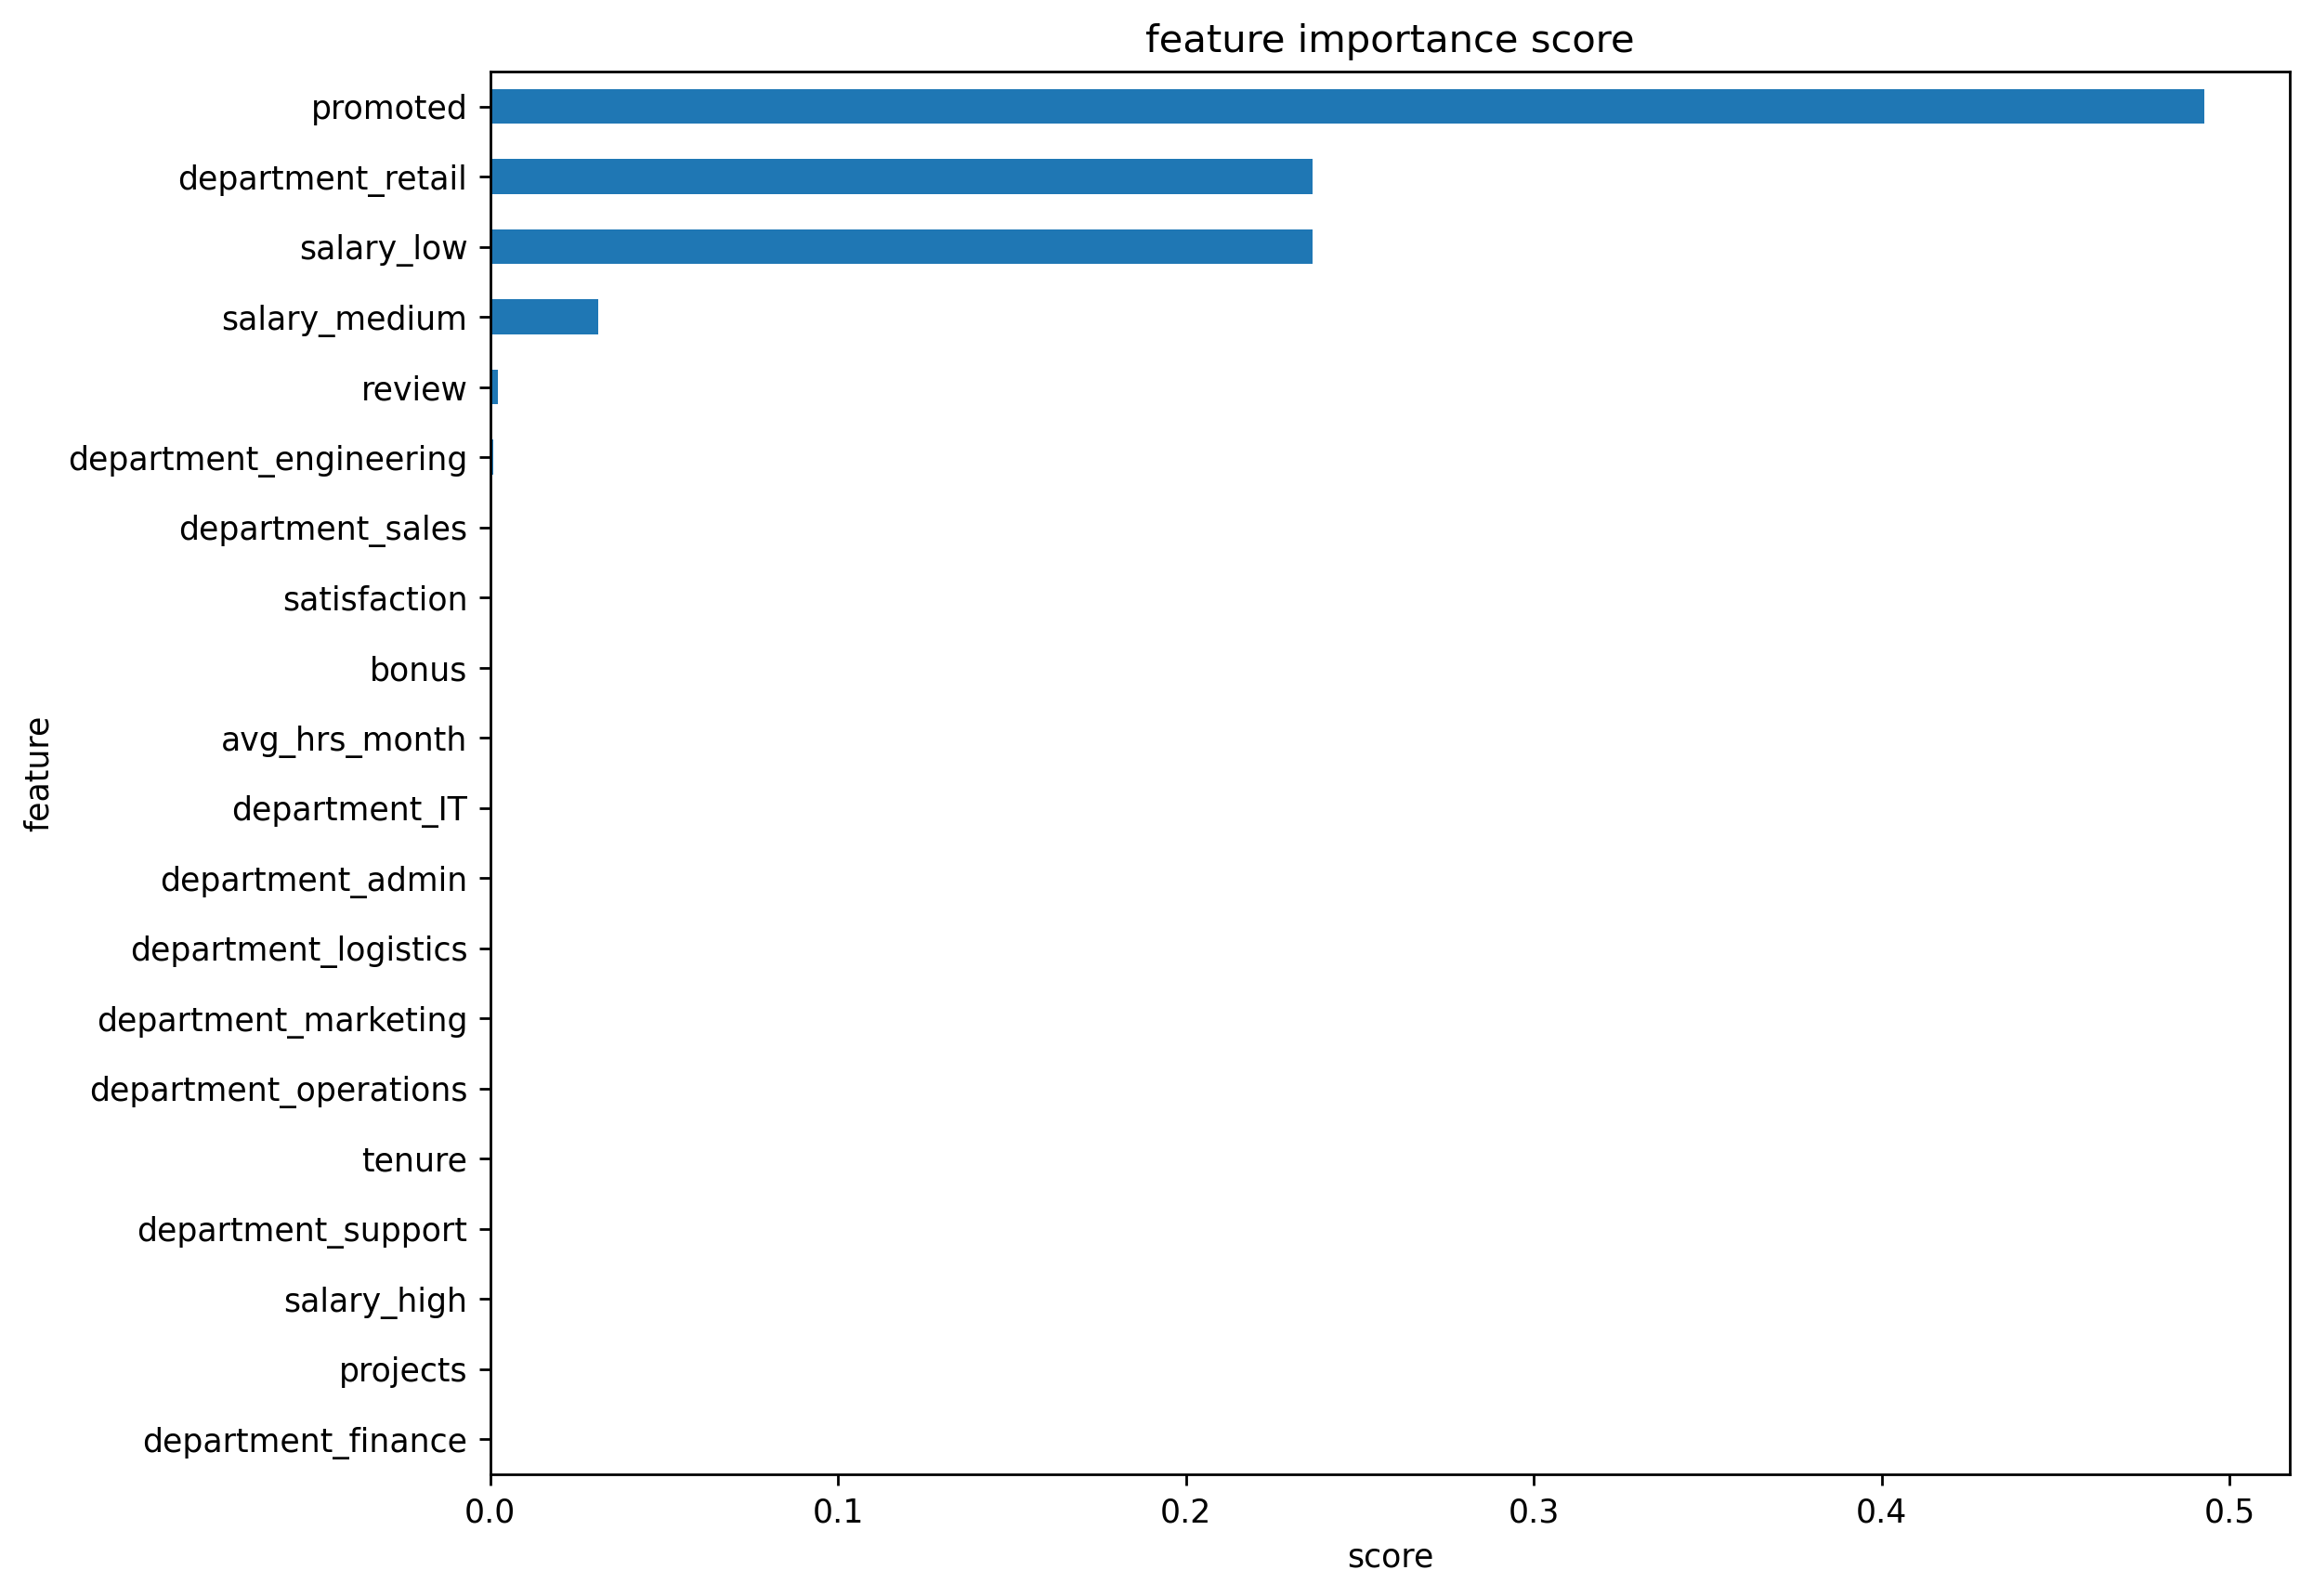

In [56]:
show_feature_importance(dt)

## Random Forest - Machine Learning

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:,1]
print(f'Training Score: \
{roc_auc_score(y_val, y_pred):.2f}')

Training Score: 0.95


In [58]:
aucs = []
for x in range(10,201,10):
    rf = RandomForestClassifier(
        n_estimators=x,criterion='entropy', random_state=24
    )
    rf.fit(X_train, y_train)
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' %(x, auc))
    aucs.append(auc)

10 -> 0.954
20 -> 0.954
30 -> 0.954
40 -> 0.954
50 -> 0.954
60 -> 0.954
70 -> 0.954
80 -> 0.954
90 -> 0.954
100 -> 0.954
110 -> 0.954
120 -> 0.954
130 -> 0.954
140 -> 0.954
150 -> 0.954
160 -> 0.954
170 -> 0.954
180 -> 0.954
190 -> 0.954
200 -> 0.954


## Parameter Tuning - Random Forest

In [59]:
all_aucs = {}

for depth in [5,10,20,50]:
    print('depth: %s' % depth)
    aucs = []

    for x in range(10,201,10):
        rf = RandomForestClassifier(
            n_estimators=x, max_depth=depth,
            random_state=24
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (x,auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.891
20 -> 0.903
30 -> 0.910
40 -> 0.904
50 -> 0.901
60 -> 0.897
70 -> 0.897
80 -> 0.899
90 -> 0.898
100 -> 0.899
110 -> 0.899
120 -> 0.901
130 -> 0.901
140 -> 0.900
150 -> 0.901
160 -> 0.899
170 -> 0.901
180 -> 0.901
190 -> 0.901
200 -> 0.901

depth: 10
10 -> 0.935
20 -> 0.938
30 -> 0.938
40 -> 0.938
50 -> 0.937
60 -> 0.938
70 -> 0.939
80 -> 0.940
90 -> 0.940
100 -> 0.941
110 -> 0.940
120 -> 0.940
130 -> 0.940
140 -> 0.940
150 -> 0.940
160 -> 0.940
170 -> 0.941
180 -> 0.941
190 -> 0.941
200 -> 0.941

depth: 20
10 -> 0.942
20 -> 0.950
30 -> 0.951
40 -> 0.951
50 -> 0.952
60 -> 0.953
70 -> 0.954
80 -> 0.954
90 -> 0.954
100 -> 0.954
110 -> 0.954
120 -> 0.954
130 -> 0.954
140 -> 0.954
150 -> 0.954
160 -> 0.954
170 -> 0.954
180 -> 0.955
190 -> 0.955
200 -> 0.955

depth: 50
10 -> 0.939
20 -> 0.948
30 -> 0.950
40 -> 0.951
50 -> 0.952
60 -> 0.953
70 -> 0.953
80 -> 0.953
90 -> 0.953
100 -> 0.953
110 -> 0.954
120 -> 0.954
130 -> 0.954
140 -> 0.954
150 -> 0.955
160 -> 0.955
170 ->

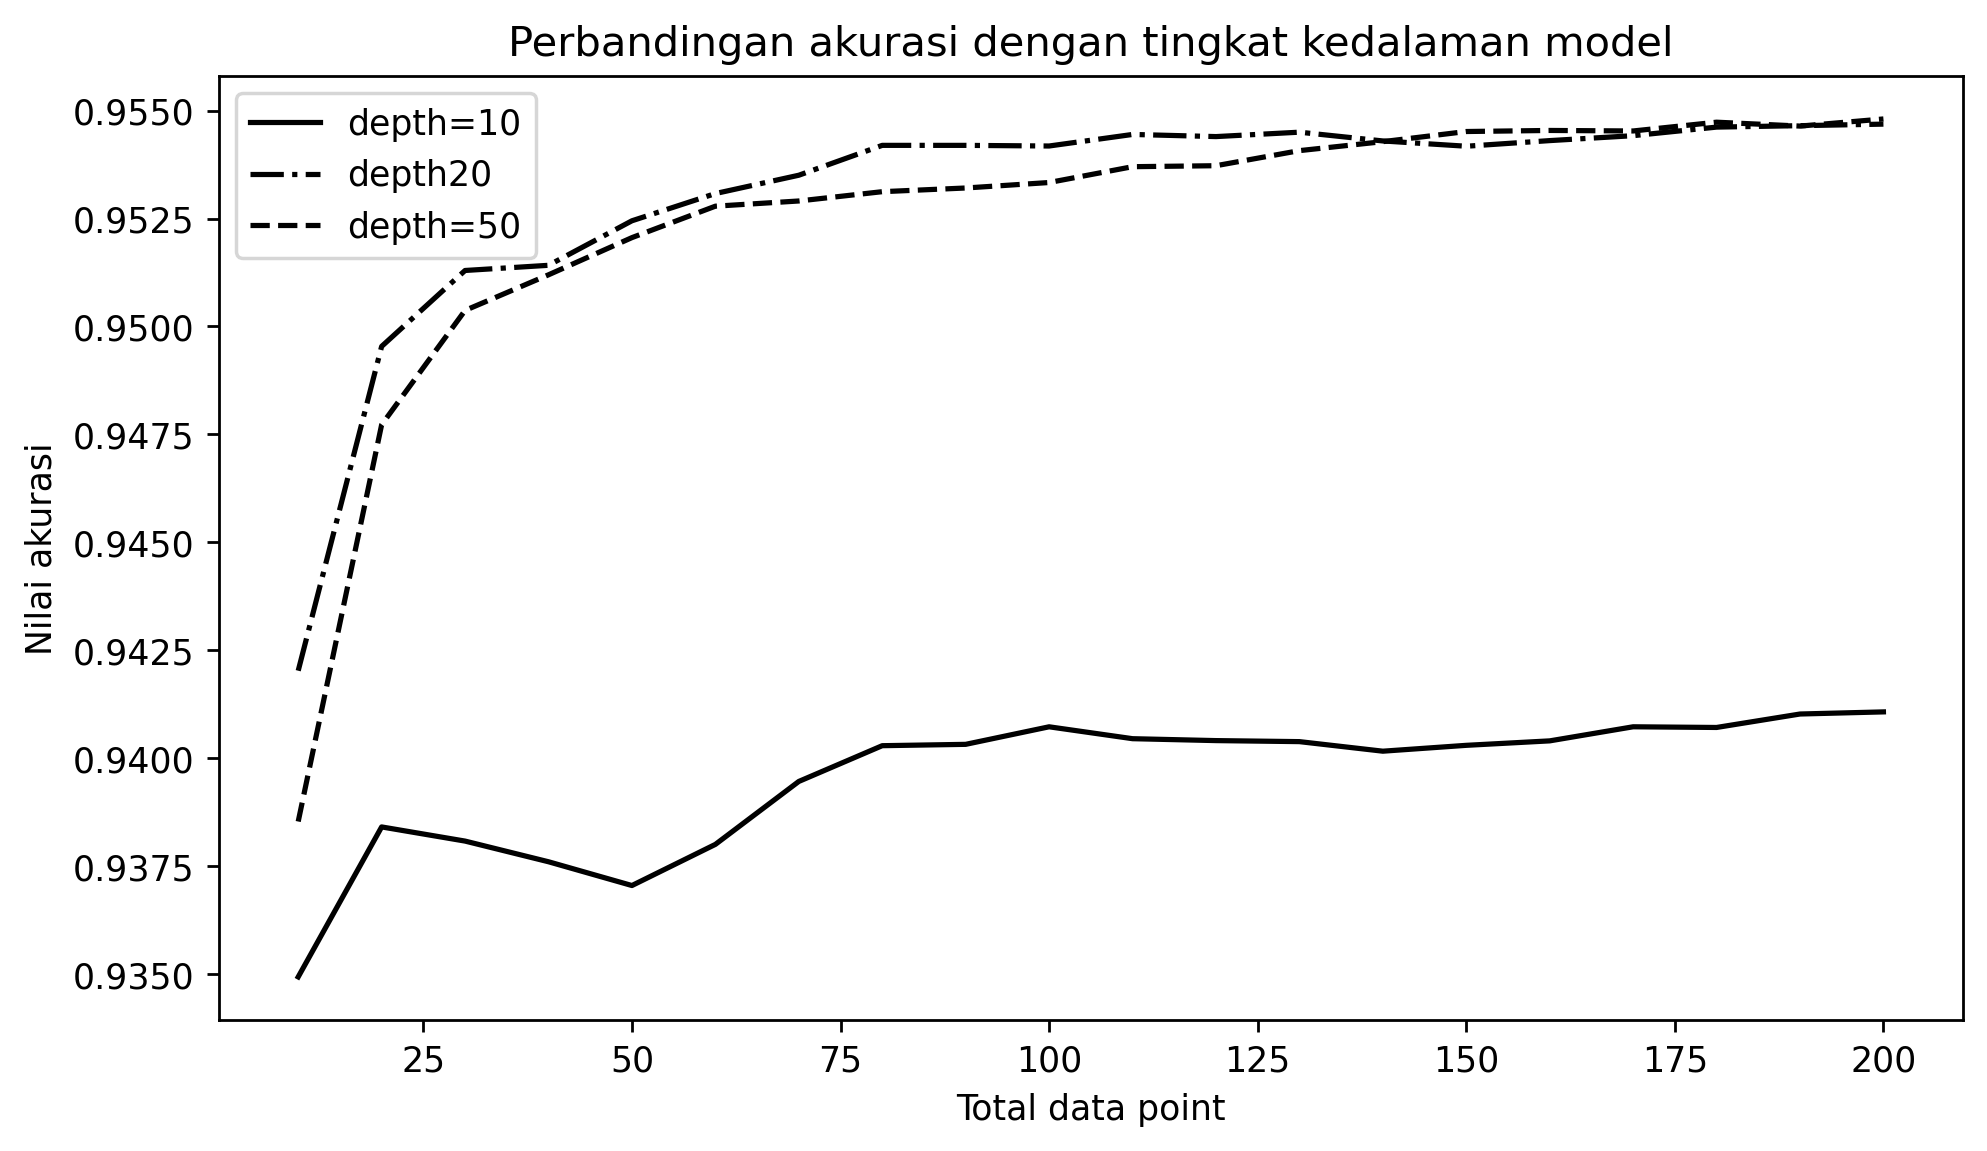

In [60]:
num_trees = list(range(10,201,10))

plt.figure(dpi=250, figsize=(9,5))
plt.plot(num_trees, all_aucs[10], 
         label='depth=10', color='black')
plt.plot(num_trees, all_aucs[20],
         label='depth20',color='black',
         linestyle='dashdot')
plt.plot(num_trees, all_aucs[50],
         label='depth=50', color='black',
         linestyle='dashed')
plt.legend()
plt.xlabel('Total data point')
plt.ylabel('Nilai akurasi')
plt.title('Perbandingan akurasi dengan tingkat kedalaman model')
plt.show()

In [61]:
all_aucs = {}
for m in [3,5,10,20]:
    print('min_samples_leaf: %s' %m)
    aucs = []

    for x in range(10,201,10):
        rf = RandomForestClassifier(
            n_estimators=x, max_depth=50,
            min_samples_leaf=m, random_state=24
        )
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' %(x, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.942
20 -> 0.946
30 -> 0.947
40 -> 0.948
50 -> 0.948
60 -> 0.949
70 -> 0.949
80 -> 0.950
90 -> 0.950
100 -> 0.950
110 -> 0.950
120 -> 0.950
130 -> 0.950
140 -> 0.950
150 -> 0.950
160 -> 0.950
170 -> 0.950
180 -> 0.950
190 -> 0.950
200 -> 0.950

min_samples_leaf: 5
10 -> 0.937
20 -> 0.942
30 -> 0.943
40 -> 0.943
50 -> 0.944
60 -> 0.944
70 -> 0.945
80 -> 0.945
90 -> 0.946
100 -> 0.946
110 -> 0.946
120 -> 0.946
130 -> 0.946
140 -> 0.946
150 -> 0.946
160 -> 0.946
170 -> 0.946
180 -> 0.946
190 -> 0.946
200 -> 0.946

min_samples_leaf: 10
10 -> 0.930
20 -> 0.936
30 -> 0.936
40 -> 0.938
50 -> 0.938
60 -> 0.939
70 -> 0.939
80 -> 0.940
90 -> 0.940
100 -> 0.940
110 -> 0.940
120 -> 0.940
130 -> 0.940
140 -> 0.940
150 -> 0.940
160 -> 0.940
170 -> 0.940
180 -> 0.941
190 -> 0.941
200 -> 0.941

min_samples_leaf: 20
10 -> 0.924
20 -> 0.929
30 -> 0.930
40 -> 0.930
50 -> 0.931
60 -> 0.932
70 -> 0.932
80 -> 0.933
90 -> 0.933
100 -> 0.933
110 -> 0.933
120 -> 0.934
130 -> 0.934
14

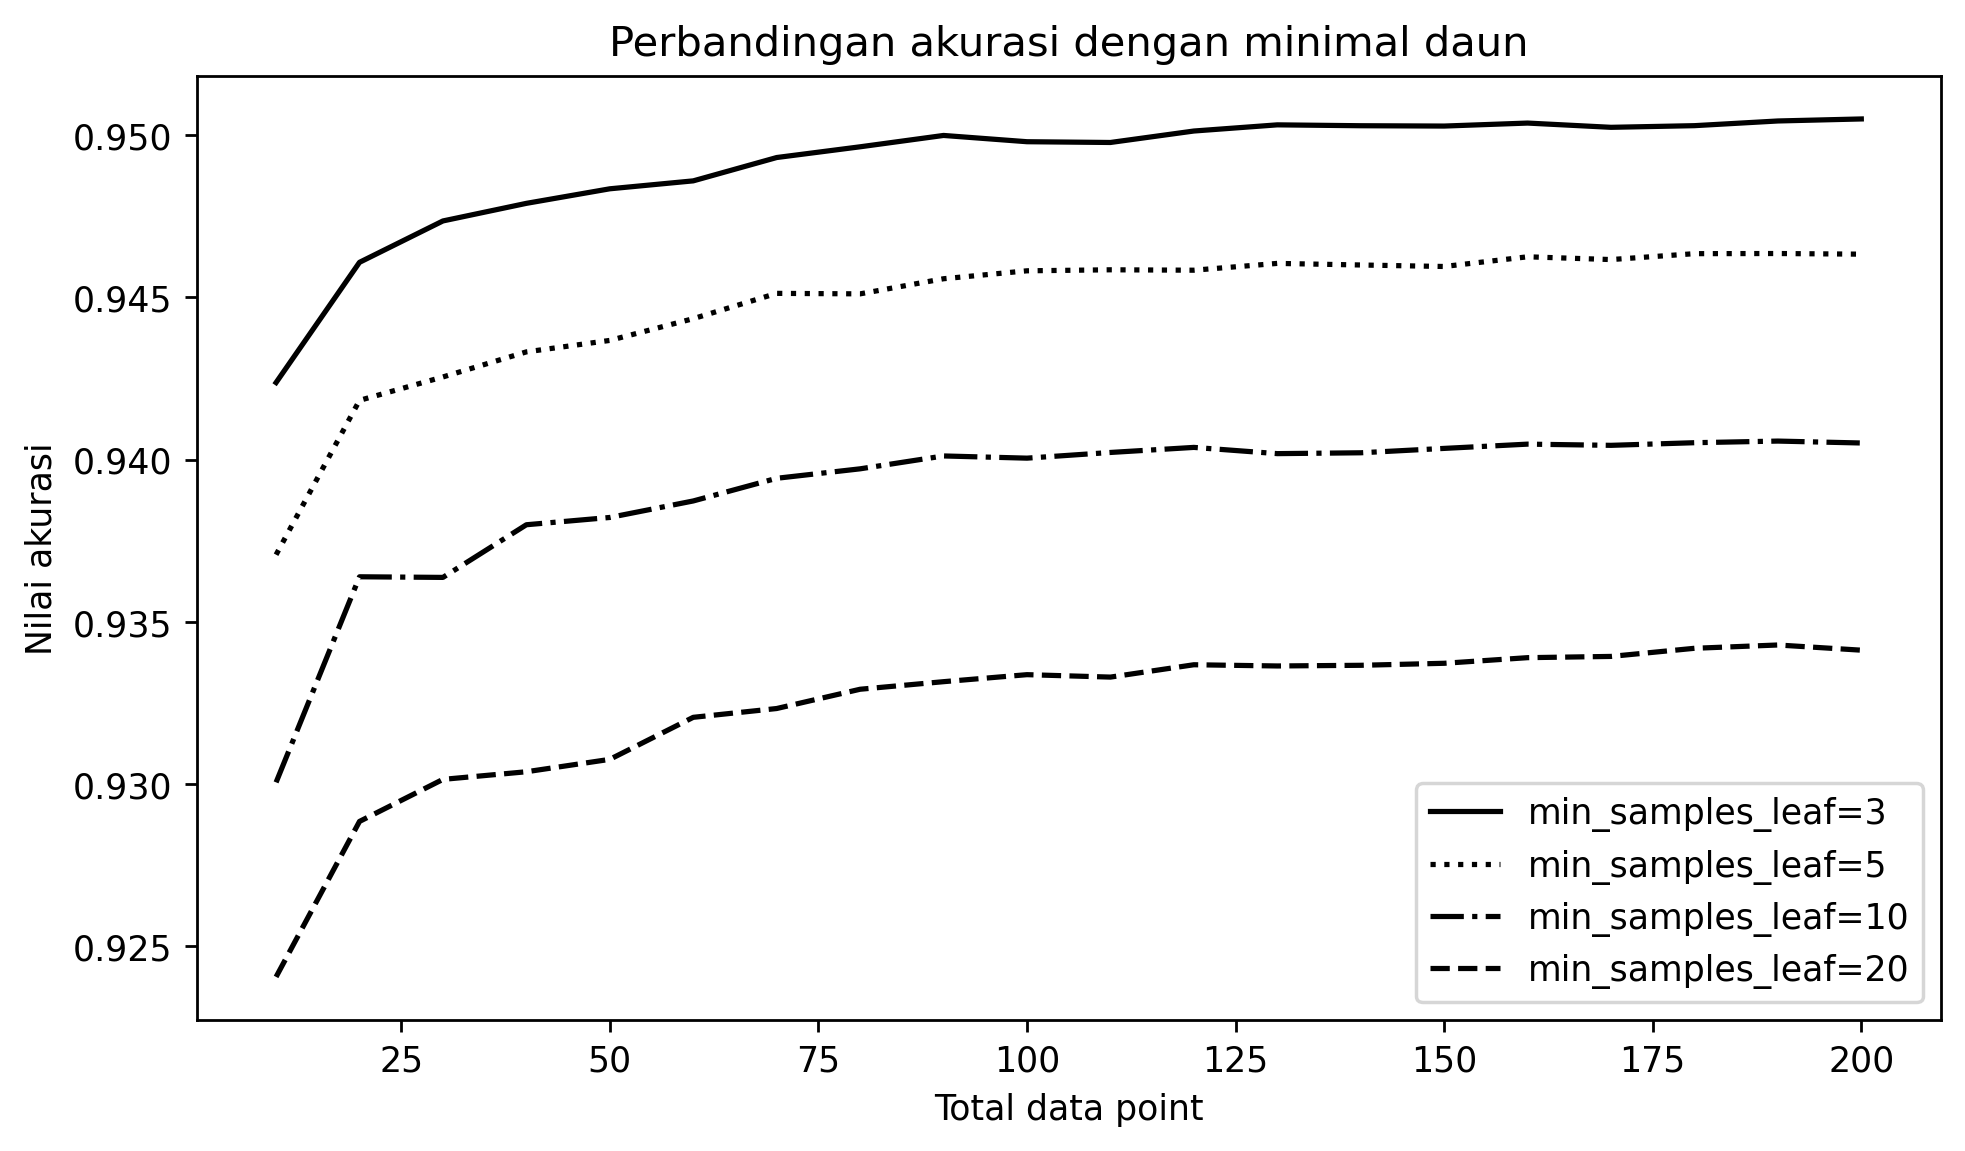

In [62]:
num_trees = list(range(10,201,10))

plt.figure(dpi=250, figsize=(9,5))
plt.plot(num_trees, all_aucs[3], 
        label='min_samples_leaf=3', color='black')
plt.plot(num_trees, all_aucs[5],
        label='min_samples_leaf=5', color='black',
         linestyle='dotted')
plt.plot(num_trees, all_aucs[10],
        label='min_samples_leaf=10', color='black',
         linestyle='dashdot')
plt.plot(num_trees, all_aucs[20],
         label='min_samples_leaf=20', color='black',
         linestyle='dashed')
plt.legend()
plt.xlabel('Total data point')
plt.ylabel('Nilai akurasi')
plt.title('Perbandingan akurasi dengan minimal daun')
plt.show()

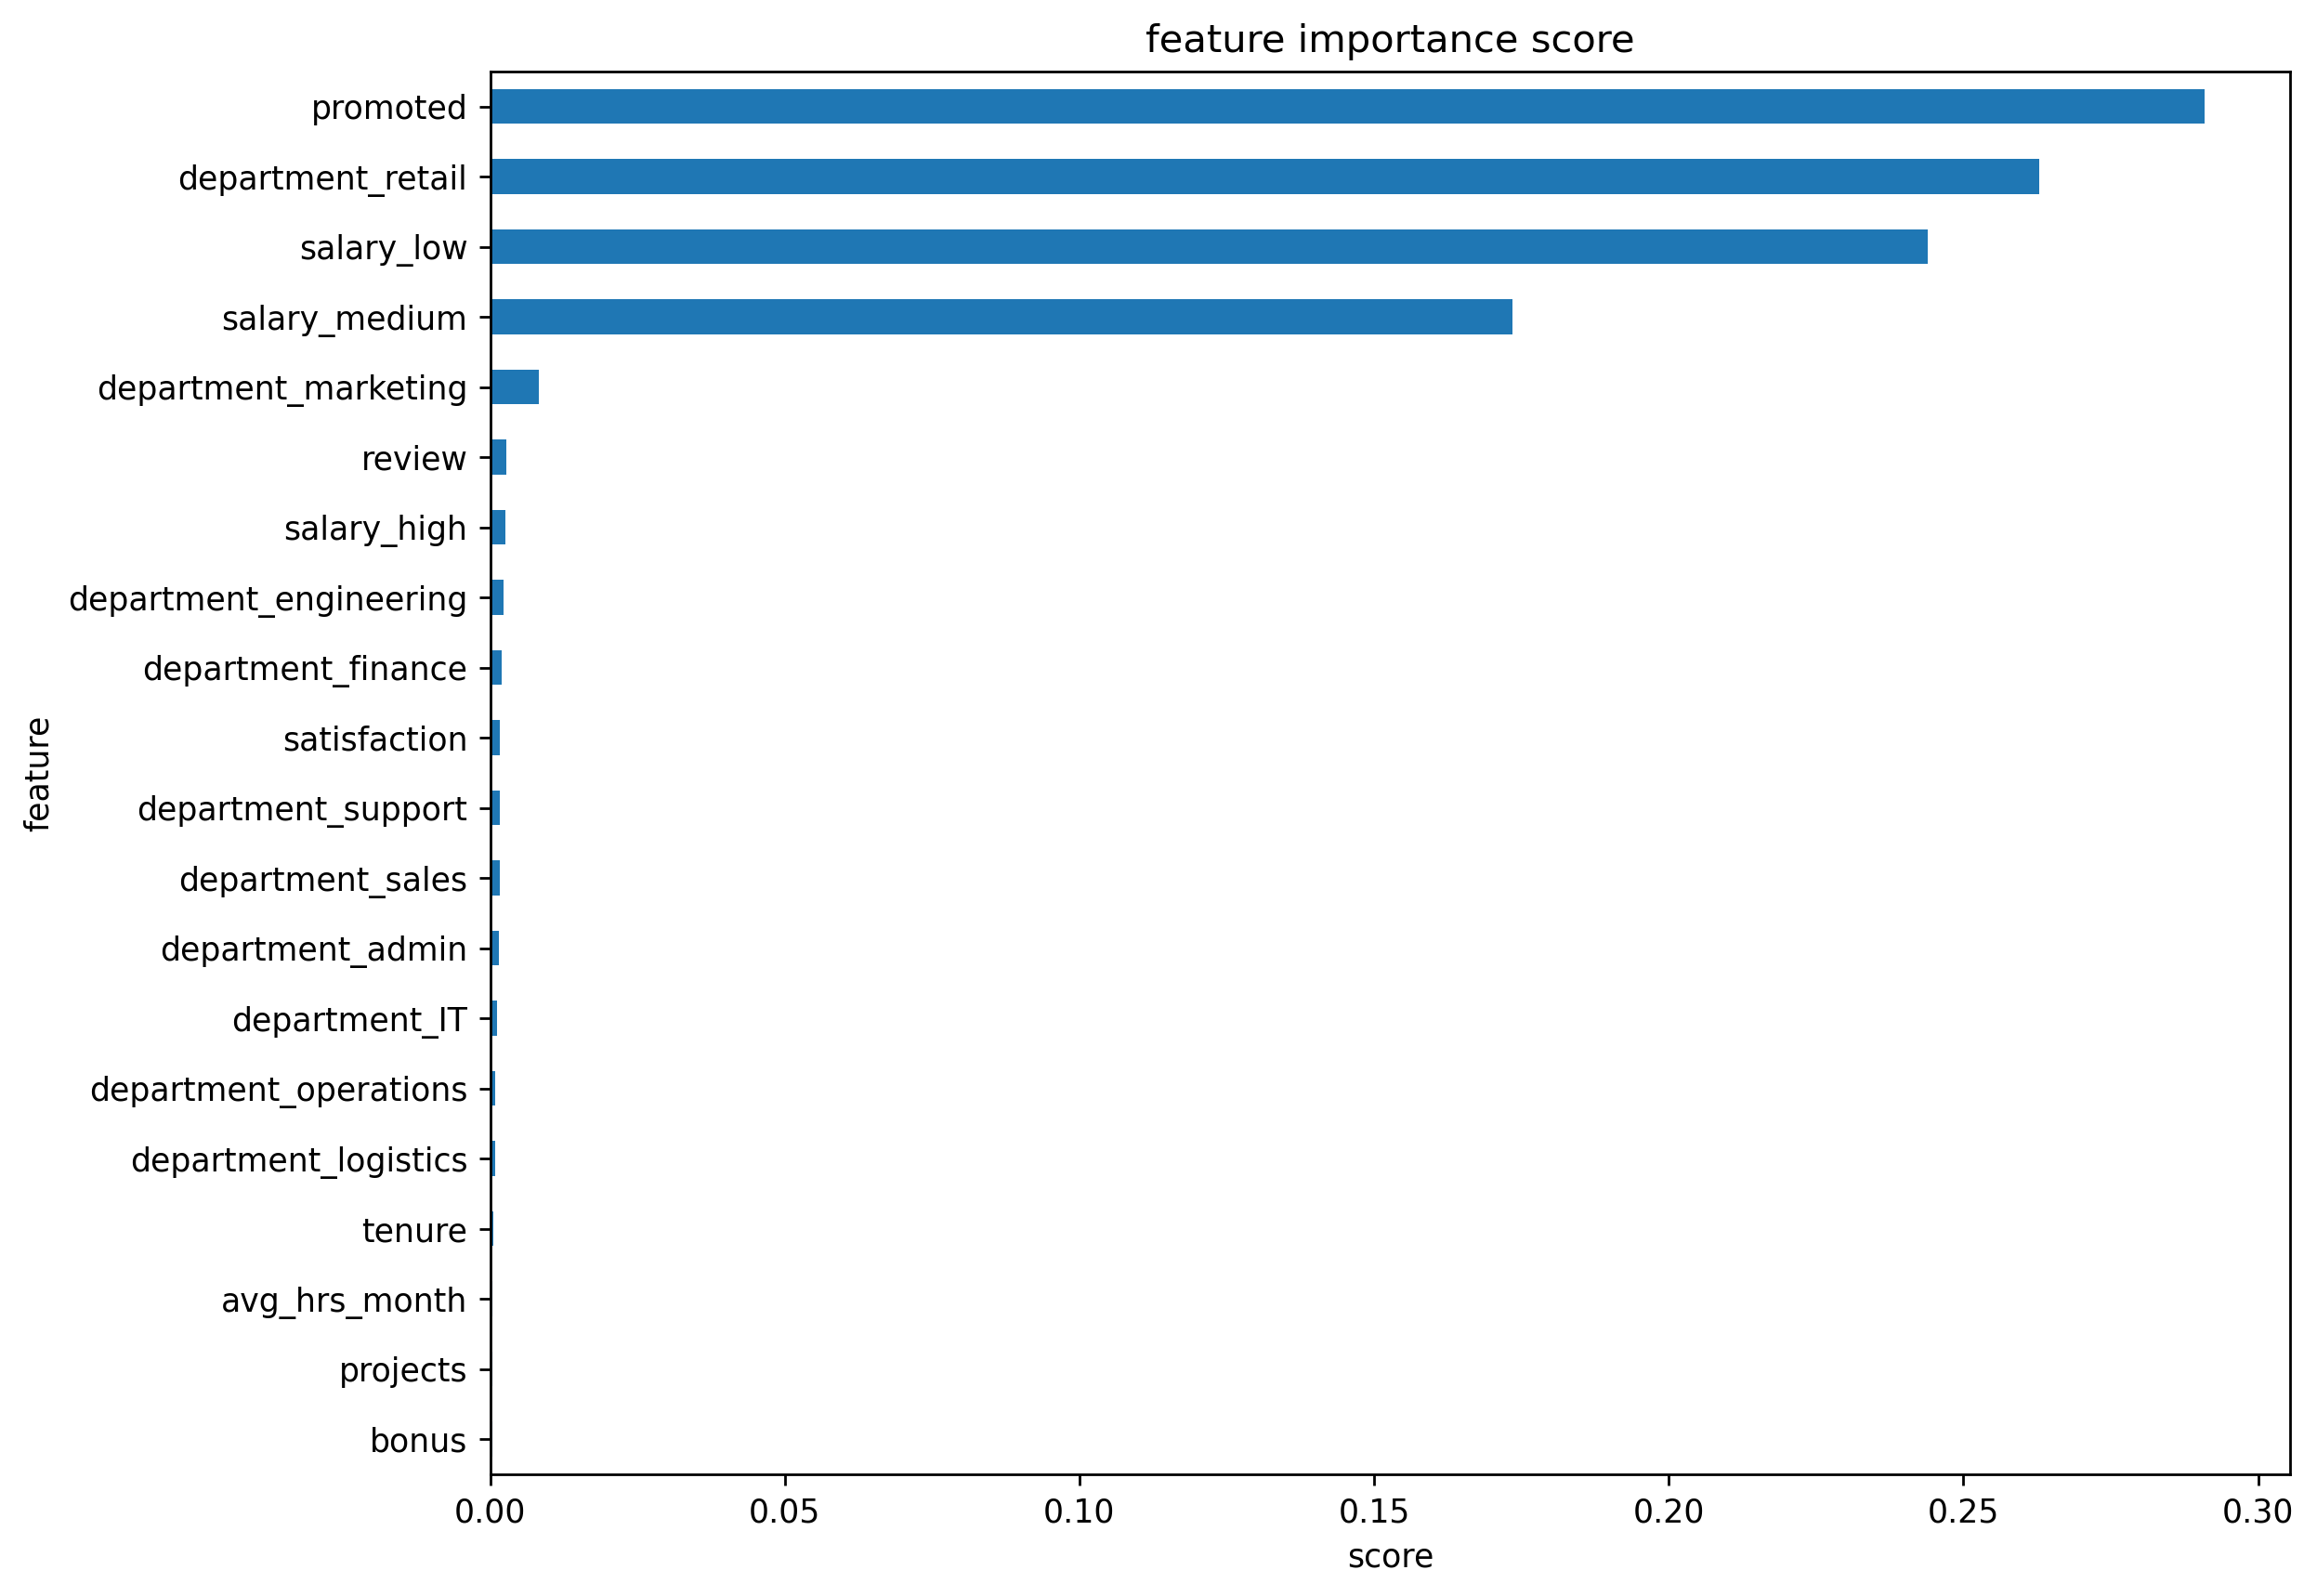

In [63]:
show_feature_importance(rf)

## Gradient Boosting - Machine Learning

In [64]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'nthread':8,
    'seed':24,
    'silent':1
}
model = xgb.train(xgb_params, dtrain,
                num_boost_round=10)
y_pred = model.predict(dval)

[14:20:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:20:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [65]:
y_pred

array([0.05663854, 0.8897705 , 0.8530925 , ..., 0.05743971, 0.13174194,
       0.4534012 ], dtype=float32)

In [66]:
roc_auc_score(y_val, y_pred)

0.9439732296770296

### Monitoring performansi model

In [67]:
watchlist = [(dtrain,'train'),
             (dval,'val')]
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':24,
    'silent':1
}
model = xgb.train(
    xgb_params, dtrain, num_boost_round=100,
    evals=watchlist, verbose_eval=10
)

[14:20:29] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.93517	val-auc:0.92292
[10]	train-auc:0.96084	val-auc:0.94484
[20]	train-auc:0.97170	val-auc:0.94931
[30]	train-auc:0.97835	val-auc:0.95302
[40]	train-auc:0.98253	val-auc:0.95406
[50]	train-auc:0.98616	val-auc:0.95413
[60]	train-auc:0.98866	val-auc:0.95401
[70]	train-auc:0.99056	val-auc:0.95390
[80]	train-auc:0.99323	val-auc:0.95406
[90]	train-auc:0.99496	val-auc:0.95396
[99]	train-auc:0.99583	val-auc:0.95370


## Parameter Tuning - XGBoost

In [68]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':24,
    'silent':1
}
model = xgb.train(
    xgb_params, dtrain, num_boost_round=500,
    evals=watchlist, verbose_eval=10
)

[14:20:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.83223	val-auc:0.83011
[10]	train-auc:0.91178	val-auc:0.90723
[20]	train-auc:0.92066	val-auc:0.91536
[30]	train-auc:0.92616	val-auc:0.92055
[40]	train-auc:0.93073	val-auc:0.92481
[50]	train-auc:0.93420	val-auc:0.92699
[60]	train-auc:0.93824	val-auc:0.93087
[70]	train-auc:0.94177	val-auc:0.93310
[80]	train-auc:0.94558	val-auc:0.93692
[90]	train-auc:0.94765	val-auc:0.93790
[100]	train-auc:0.94938	val-auc:0.93913
[110]	train-auc:0.95095	val-auc:0.94019
[120]	train-auc:0.95233	val-auc:0.94152
[130]	train-auc:0.95430	val-auc:0.94288
[140]	train-auc:0.95633	val-auc:0.94413
[150]	train-auc:0

## Model untuk data uji

In [69]:
y_train = (df_train_full['left']).values
y_test = (df_test['left']).values

del df_train_full['left']
del df_test['left']

In [70]:
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [71]:
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [72]:
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    xgb_params = {
        'eta':0.1,
        'max_depth':3,
        'min_child_weight':1,
        'objective':'binary:logistic',
        'eval_metric':'auc',
        'nthread':8,
        'seed':24,
        'silent':1
    }
    num_trees = 380
    model = xgb.train(xgb_params, dtrain,
                    num_boost_round=num_trees)

[14:20:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [73]:
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)

0.9986588048189996

In [79]:
feature_important = model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

<AxesSubplot:>

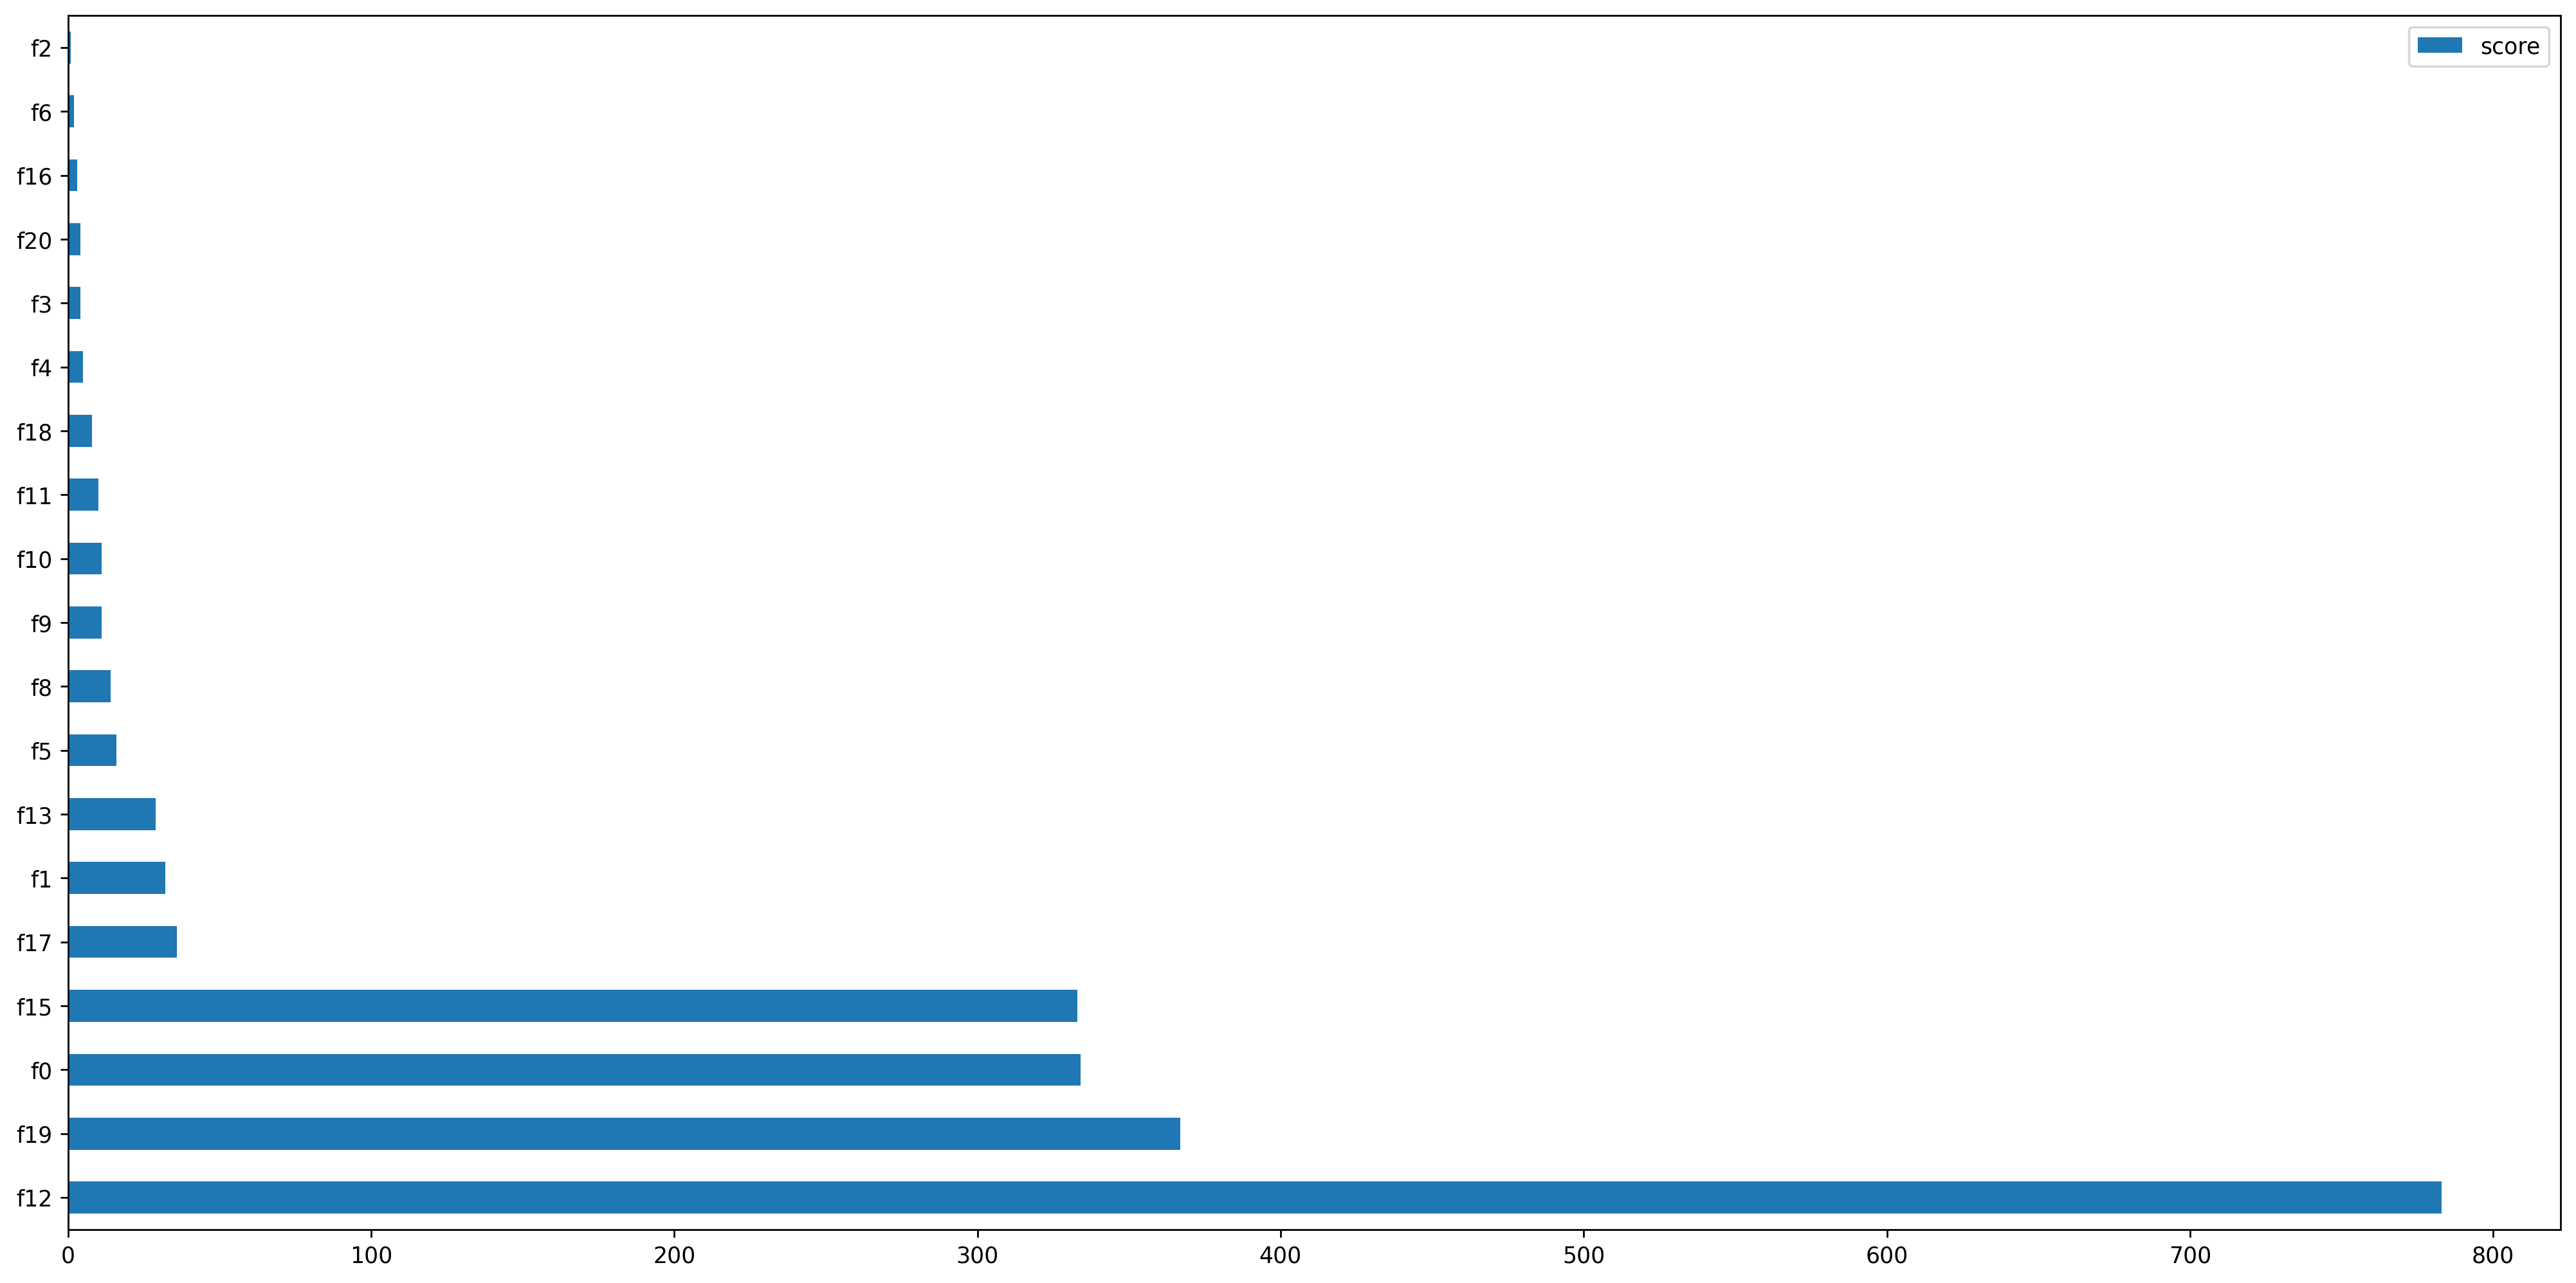

In [80]:
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10))

In [81]:
# Use pprint to make the vocabulary easier to read
import pprint
pprint.pprint(dv.vocabulary_)

{'avg_hrs_month': 0,
 'bonus': 1,
 'department_IT': 2,
 'department_admin': 3,
 'department_engineering': 4,
 'department_finance': 5,
 'department_logistics': 6,
 'department_marketing': 7,
 'department_operations': 8,
 'department_retail': 9,
 'department_sales': 10,
 'department_support': 11,
 'index': 12,
 'projects': 13,
 'promoted': 14,
 'review': 15,
 'salary_high': 16,
 'salary_low': 17,
 'salary_medium': 18,
 'satisfaction': 19,
 'tenure': 20}


In [82]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,11)
for t in thresholds:
    left = y_pred_xgb >=t
    acc = accuracy_score(y_test, left)
    print('%0.2f %0.5f' %(t, acc))

0.00 0.50818
0.10 0.99628
0.20 0.99814
0.30 0.99814
0.40 0.99814
0.50 0.99814
0.60 0.99851
0.70 0.99851
0.80 0.99851
0.90 0.99814
1.00 0.49182


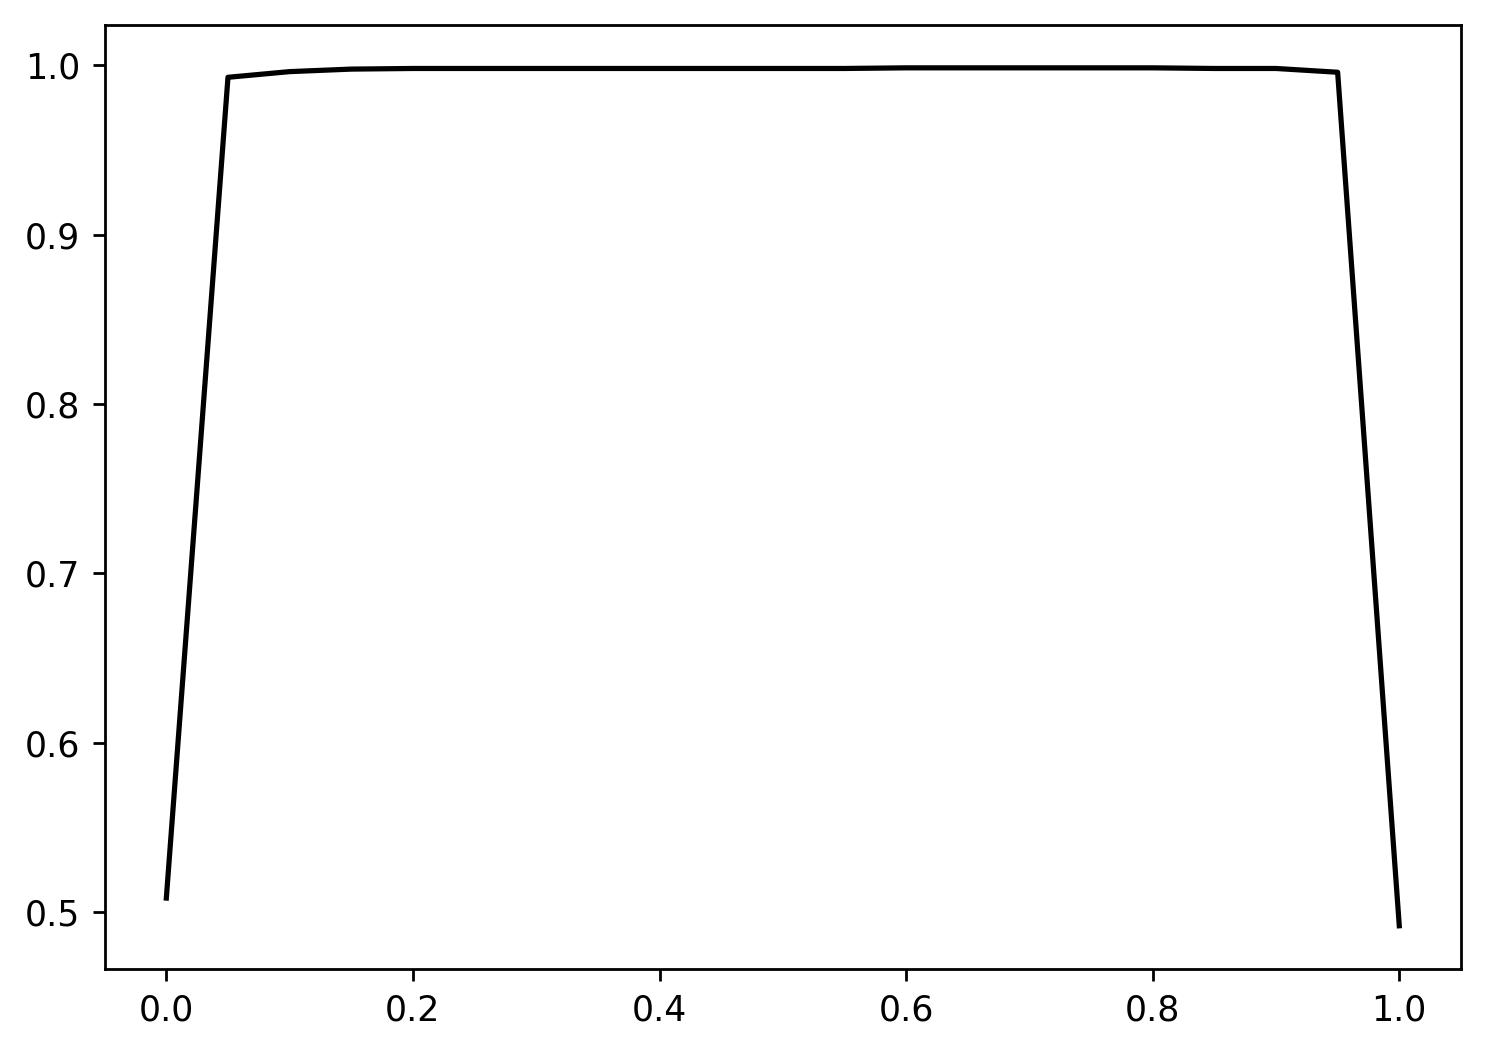

In [83]:
thresholds = np.linspace(0,1,21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_test, y_pred_xgb >=t)
    accuracies.append(acc)

plt.figure(figsize=(7,5))
plt.plot(thresholds, accuracies, c='black')
plt.show()

In [84]:
t = 0.5
predict_left = (y_pred_xgb >=t)
predict_no_left = (y_pred_xgb < t)

actual_left = (y_test ==1)
actual_no_left = (y_test ==0)
true_positive = (predict_left & actual_left).sum()
false_positive = (predict_left & actual_no_left).sum()

false_negative = (predict_no_left & actual_left).sum()
true_negative = (predict_no_left & actual_no_left).sum()

In [85]:
confusion_matrix = np.array(
    [[true_positive, false_positive],
     [false_negative, true_negative]]
)
print(confusion_matrix)

[[1364    3]
 [   2 1319]]


In [86]:
print(f'Precision = {1364/(1364+2)*100:.2f}')
print(f'Recall = {1364/(1364+2)*100:.2f}')

Precision = 99.85
Recall = 99.85


In [87]:
print(f'False Positive Rate = \
{2/(2+1320)*100:.2f}')
print(f'True Positive rate = \
{1364/(1364+2)*100:.2f}')

False Positive Rate = 0.15
True Positive rate = 99.85


In [88]:
scores = []
thresholds = np.linspace(0,1,101)
for t in thresholds:
    tp = ((y_pred_xgb >=t) & (y_test==1)).sum()
    fp = ((y_pred_xgb >=t) & (y_test==0)).sum()
    fn = ((y_pred_xgb <t) & (y_test==1)).sum()
    tn = ((y_pred_xgb <t) & (y_test==0)).sum()
    scores.append((t,tp,fp,fn,tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['Thresholds','TP',
                     'FP', 'FN', 'TN']
df_scores[::10]

,Thresholds,TP,FP,FN,TN
0,0.0,1366,1322,0,0
10,0.1,1364,8,2,1314
20,0.2,1364,3,2,1319
30,0.3,1364,3,2,1319
40,0.4,1364,3,2,1319
50,0.5,1364,3,2,1319
60,0.6,1364,2,2,1320
70,0.7,1364,2,2,1320
80,0.8,1364,2,2,1320
90,0.9,1363,2,3,1320


In [89]:
df_scores['TPR'] = df_scores['TP'] /(
    df_scores['TP'] + df_scores['FN']
)
df_scores['FPR'] = df_scores['FP'] / (
    df_scores['FP'] + df_scores['TN']
)
df_scores[::10]

,Thresholds,TP,FP,FN,TN,TPR,FPR
0,0.0,1366,1322,0,0,1.000000,1.000000
10,0.1,1364,8,2,1314,0.998536,0.006051
20,0.2,1364,3,2,1319,0.998536,0.002269
30,0.3,1364,3,2,1319,0.998536,0.002269
40,0.4,1364,3,2,1319,0.998536,0.002269
50,0.5,1364,3,2,1319,0.998536,0.002269
60,0.6,1364,2,2,1320,0.998536,0.001513
70,0.7,1364,2,2,1320,0.998536,0.001513
80,0.8,1364,2,2,1320,0.998536,0.001513
90,0.9,1363,2,3,1320,0.997804,0.001513


In [90]:
rf.fit(X_train,y_train)
y_pred = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.9988022274250603

In [91]:
dt.fit(X_train,y_train)
pred = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test,pred)

0.9983877416310971

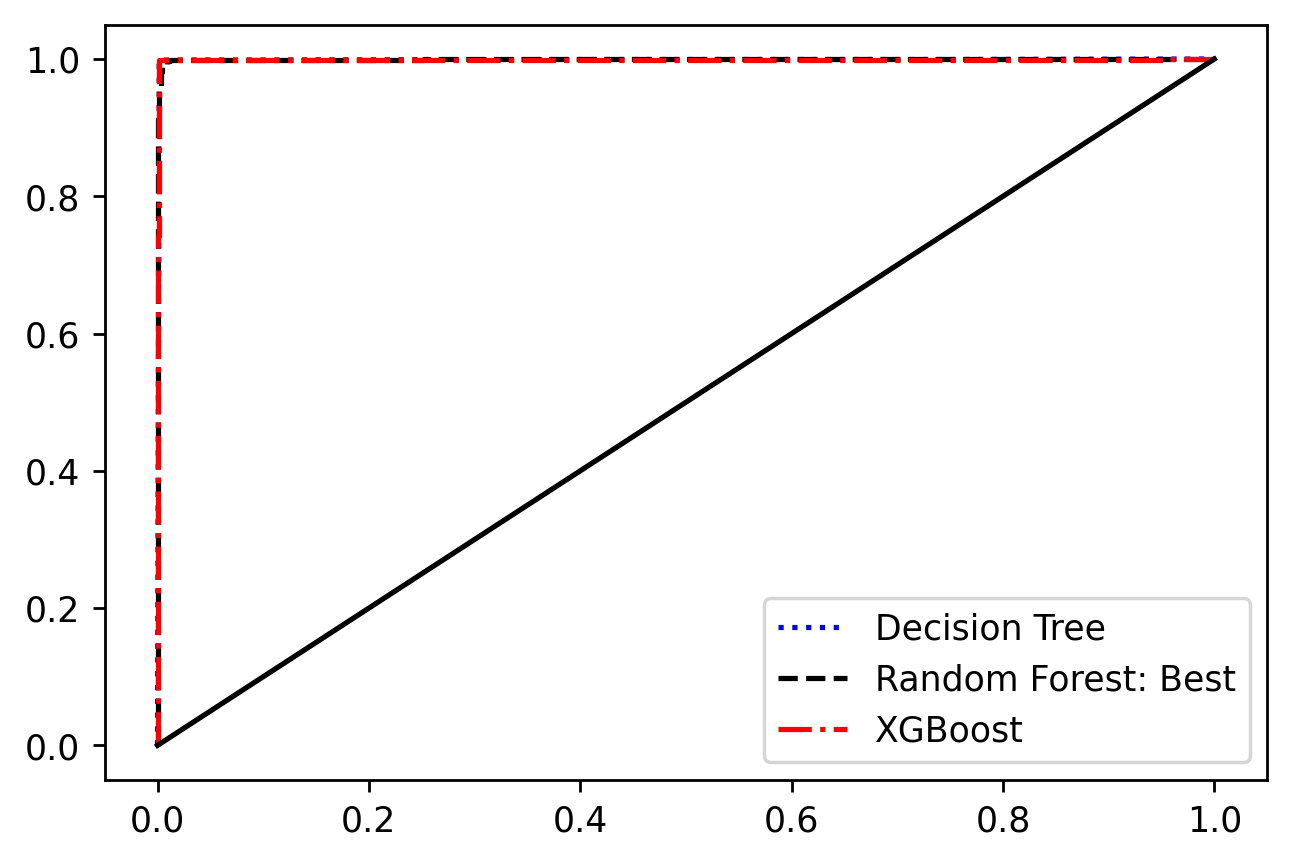

In [93]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_test,y_pred_xgb)
fpr__, tpr__, thresholds__ = roc_curve(y_test,pred)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred)
plt.plot(fpr__, tpr__, color='blue', linestyle='dotted')
plt.plot(fpr_,tpr_,color='black', linestyle='dashed') 
plt.plot(fpr,tpr,color='red', 
         linestyle='dashdot')
plt.plot([0,1],[0,1], color='black')
plt.legend(['Decision Tree','Random Forest: Best','XGBoost'])
plt.show()